## 1. Perkenalan

DS=Suma Bimantoro Andru

## 2.- Import Libraries

In [43]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## 3 - Data Loading

In [44]:
#import data train
data1=pd.read_csv('Train-1542865627584.csv') #label #done
data2=pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
data3=pd.read_csv('Train_Inpatientdata-1542865627584.csv')
data4=pd.read_csv('Train_Outpatientdata-1542865627584.csv')

In [45]:
#import data test
datates1=pd.read_csv('Test-1542969243754.csv') 
datates2=pd.read_csv('Test_Beneficiarydata-1542969243754.csv')
datates3=pd.read_csv('Test_Inpatientdata-1542969243754.csv')
datates4=pd.read_csv('Test_Outpatientdata-1542969243754.csv')

## EDA


In [46]:
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    plt.show()
    
def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)
    plt.show()

### Analyze Train/Test Data (Class labels)

In [47]:
data1.head()

Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No

Peneliti merencanakan plot di bawah ini untuk memeriksa distribusi label kelas.

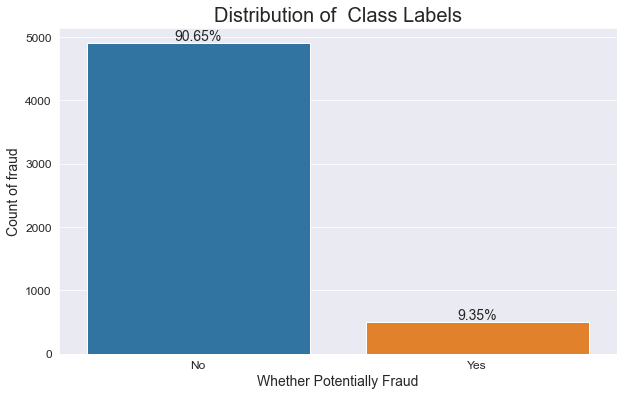

In [49]:
# Check distribution of potential Fraudulent providers
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
ax = sns.countplot(x='PotentialFraud',data=data1)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Distribution of  Class Labels', fontsize=20)
plt.xlabel('Whether Potentially Fraud', size = 14)
plt.ylabel('Count of fraud', size = 14)
percentage_without_hue(ax, data1['PotentialFraud'], 0,40,14)

Terlihat dataset `unbalance dimana 9.35% pontensial Fraud dan 90.65% tidak Fraud`

### Analyze Train_Beneficiary/Test_Beneficiary Data

In [50]:
# display all the columns in a dataframe
pd.set_option('display.max_columns', None)

In [54]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [51]:
data2.head()

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0     230                   12                   12                      1   
1     280                   12                   12                      2   
2     590                   12                   12                      1   
3     270                   12                   12                      1   
4     680                   12                   12                      2   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         2                          1                   2   
1                         2                          2                   2   
2                         2                          2                   2   
3                         1                          2                   2   
4                         2                          2                   2   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           2                       1                     1   
1                           2                       2                     2   
2                           2                       2                     2   
3                           2                       2                     1   
4                           1                       2                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         2   
1                          2                         2   
2                          1                         2   
3                          1                         1   
4                          2                         2   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                2                   2   
2                                2                   2   
3                                1                   2   
4                                2                   2   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt  
0                     70  
1                     50  
2                     40  
3                    760  
4                   1200

In [53]:
# Replacing 2 with 0 for chronic conditions, Zero indicates chronic condition is No

data2 = data2.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

# For RenalDiseaseIndicator replacing 'Y' with 1
data2 = data2.replace({'RenalDiseaseIndicator': 'Y'}, 1)

datates2 = datates2.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

datates2 = datates2.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Peneliti merubah chronic conditions dari 2 ke 0, yang artinnya 0 adalah tidak

In [55]:
# convert all these columns datatypes to numeric
data2[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = data2[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)

# convert all these columns datatypes to numeric
datates2[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = datates2[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)



In [58]:
# Replacing '2' with '0' for Gender Type
data2 = data2.replace({'Gender': 2}, 0)

datates2 = datates2.replace({'Gender': 2}, 0)

`Plotting the distribution of Gender in Beneficiary Data. Plotted countplot of Gender.`

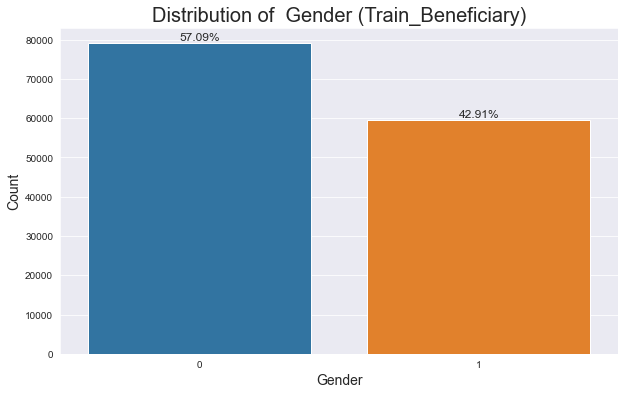

In [59]:
# Plot distribution of gender in Beneficiaries data
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Gender',data=data2, order = data2['Gender'].value_counts().index)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Distribution of  Gender (Train_Beneficiary)', fontsize=20)
plt.xlabel('Gender', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, data2['Gender'], 0,800,12)

### Observation:
The ratio of genders in beneficiary data is Gender_0 : Gender1 = 57.09% : 42.91%.

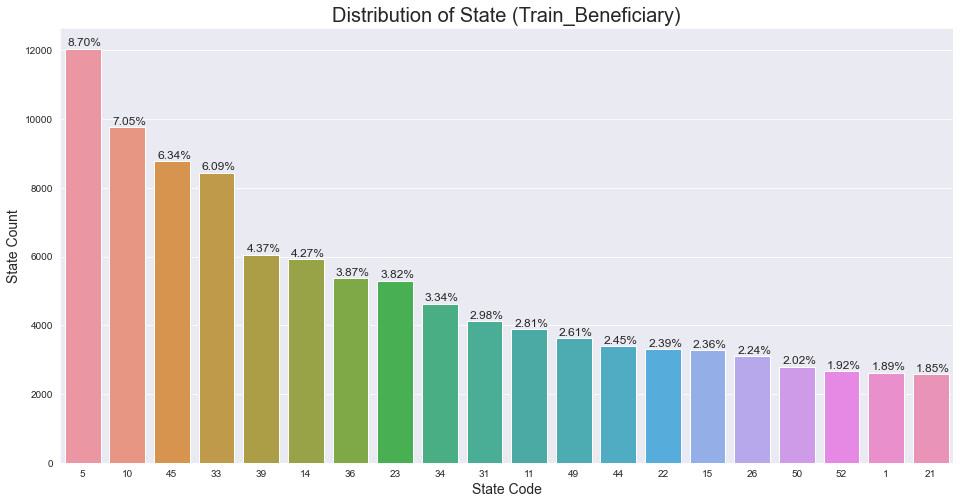

In [61]:
# Plot top 20 states from where the beneficiaries belong
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='State',y=None, data=data2, orient ="v", order = data2['State'].value_counts().head(20).index)
plt.title('Distribution of State (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('State Code', size = 14)
plt.ylabel('State Count', size = 14)
percentage_without_hue(ax, data2['State'], 0.05, 80,12)

### Observation:
1. Top 20 states in terms of beneficiary count are shown in the above pic.
2. States with code 5, 10, 45, 33 and 39 are the top 5 states.
3. 8.7% of the beneficiaries belongs to state 5

### Plotting top 20 Countries in terms of beneficiary count

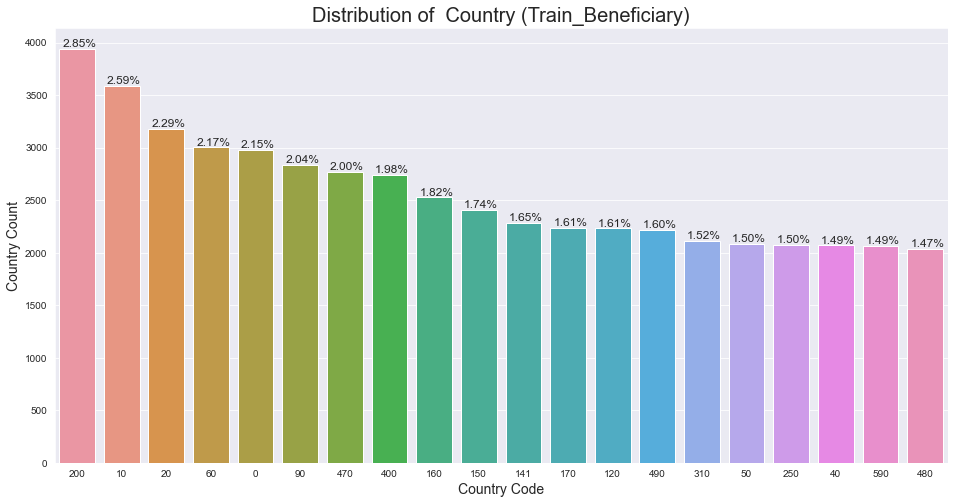

In [62]:
# Plot top 20 Country from where the beneficiaries belong
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='County',y=None, data=data2, orient ="v", order = data2['County'].value_counts().head(20).index)
plt.title('Distribution of  Country (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Country Code', size = 14)
plt.ylabel('Country Count', size = 14)
percentage_without_hue(ax, data2['County'], 0.05, 20,12)

### Observation:
1. Top 20 countries in terms of beneficiary count are shown in the above pic.
2. Countries with code 200, 10, 20, 60 and 0 are the top 5 states.
3. 2.85% of the beneficiaries belongs to country code 200.

### Plotting countplot of Race in the beneficiary data

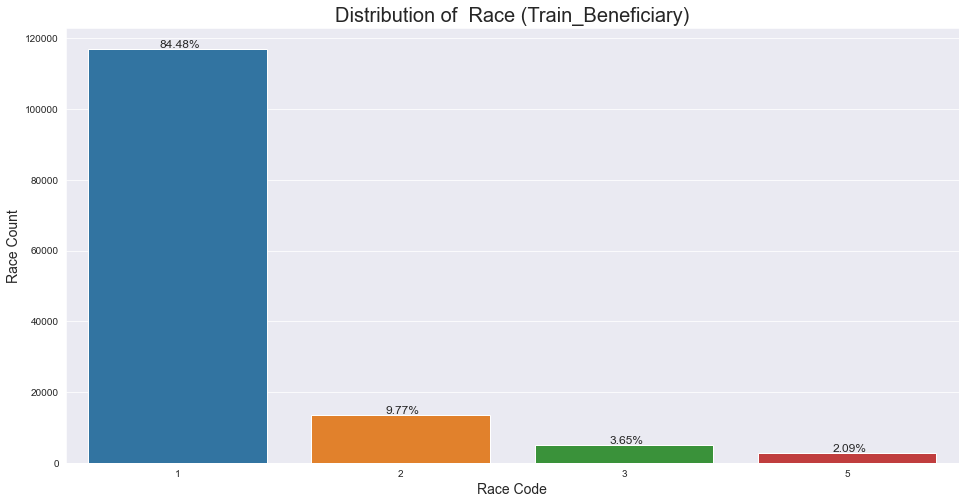

In [63]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Race',y=None, data=data2, orient ="v", order = data2['Race'].value_counts().index)
plt.title('Distribution of  Race (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Race Code', size = 14)
plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, data2['Race'], 0.01, 200,12)

### Observation:
1. Race 1 is the most in terms of beneficiary count.
2. 85% beneficiaries belongs to race 1.
3. There is no race 4 in the dataset.

### Plot the countplot of NoOfMonths_PartACov for all beneficiaries

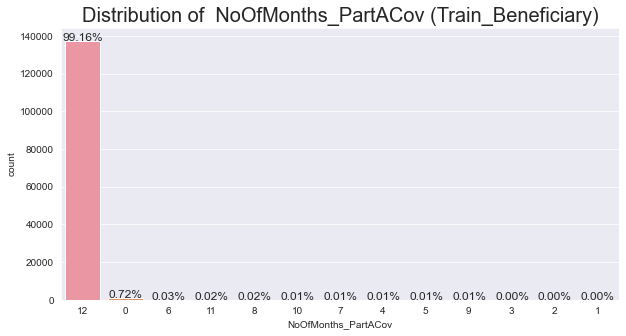

In [66]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='NoOfMonths_PartACov',y=None, data=data2, orient ="v", order = data2['NoOfMonths_PartACov'].value_counts().index)
plt.title('Distribution of  NoOfMonths_PartACov (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
# plt.xlabel('Race Code', size = 14)
# plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, data2['Race'], 0.01, 200,12)

### Observation:
1. 99% patients covered Part A for 12 months.

### Plot the countplot of NoOfMonths_PartBCov for all beneficiaries

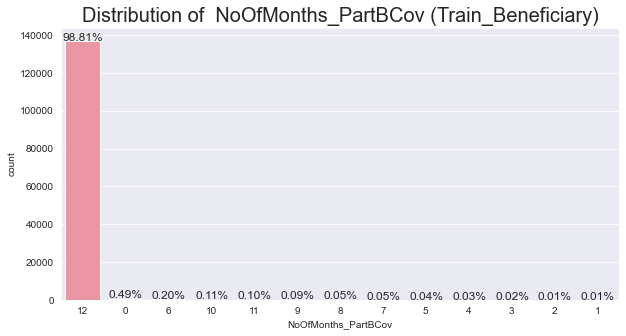

In [68]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='NoOfMonths_PartBCov',y=None, data=data2, orient ="v", order = data2['NoOfMonths_PartBCov'].value_counts().index)
plt.title('Distribution of  NoOfMonths_PartBCov (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
# plt.xlabel('Race Code', size = 14)
# plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, data2['Race'], 0.01, 200,12)

### Observation:
1. 98% patients covered Part B for 12 months.

### Plot Scatterplot OPAnnualDeductibleAmt vs OPAnnualReimbursementAmt

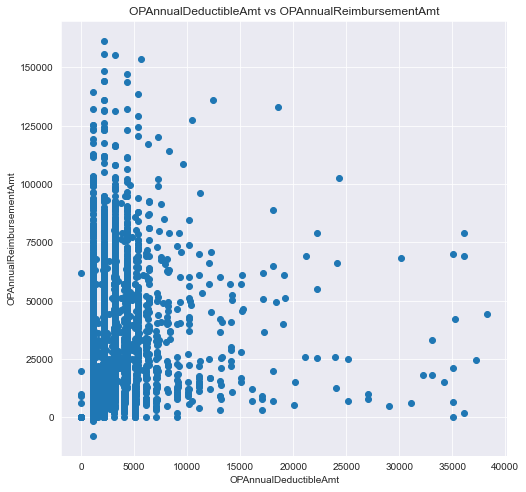

In [69]:
# Plot Scatterplot IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt
plt.figure(figsize=(8, 8))
plt.scatter(data2.IPAnnualDeductibleAmt, data2.IPAnnualReimbursementAmt)
plt.xlabel('OPAnnualDeductibleAmt')
plt.ylabel('OPAnnualReimbursementAmt')
plt.title('OPAnnualDeductibleAmt vs OPAnnualReimbursementAmt')
plt.show()

### Observation:
OPAnnualDeductibleAmt indicated the amount paid by the beneficiary anually for outpatient claim and OPAnnualReimbursementAmt indicates the reimbursement amount the beneficiary is eligible for per annum.

1. For some of the patients even though the deductible amount is zero, reimbursement is very high.
2. For some of the patients deductible amount is very high but reimbursement amount zero or very low.
May be these data are wrong due to wrong entry

### Analyze Train_Inpatient/Test_Inpatient Data

In [76]:
data3.head(3)

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN  2009-08-31                  6186             1068.0   
2      PHY324689  2009-09-17                 29590             1068.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1  2009-09-02                750               6186               2948   
2  2009-09-20                883              29623              30390   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              56400                NaN                NaN                NaN   
2              71690              34590              V1581              32723   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN              7092.0                 NaN   
2                 NaN                 NaN                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  
0                 NaN  
1                 NaN  
2                 NaN

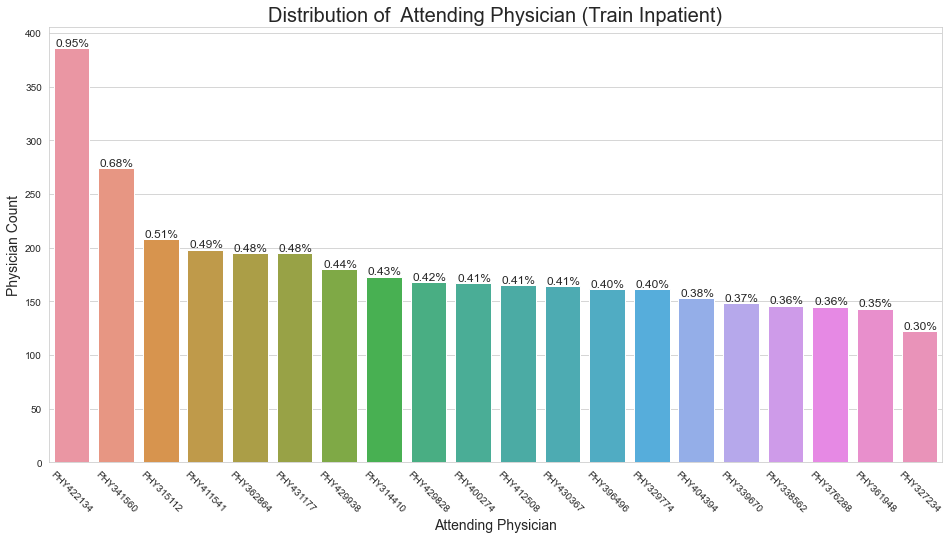

In [77]:
# Plot top 20 Attending Physician in terms of number of patients treated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='AttendingPhysician',y=None, data=data3, orient ="v", order = data3['AttendingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  Attending Physician (Train Inpatient)', fontsize=20)
plt.xlabel('Attending Physician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, data3['AttendingPhysician'], 0.02, 2, 12)

### Observation:
1. PHY422134, PHY341560, PHY315112, PHY411541, PHY431177 are the top 5 attending physicians in terms of number of patients visit.
2. PHY422134 treated 1% of the total patients.

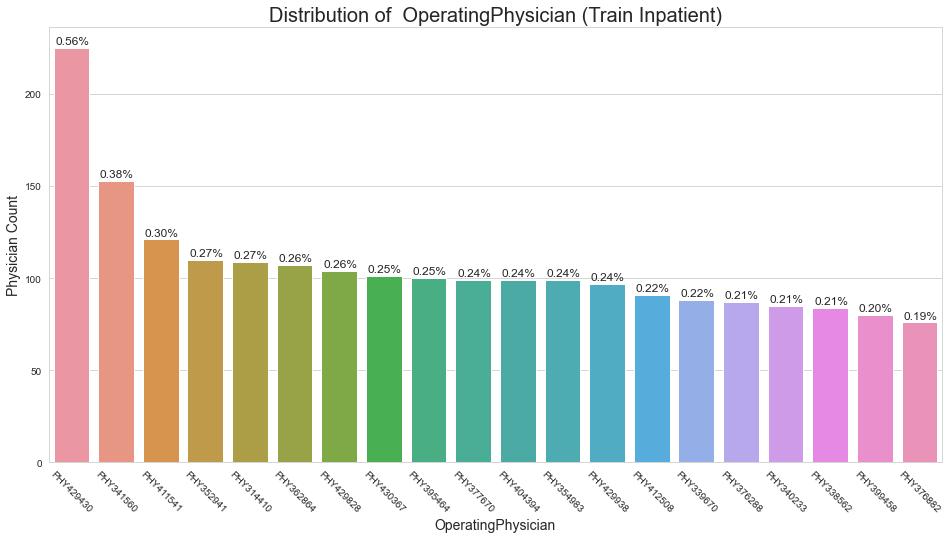

In [78]:
# Plot top 20 Operating Physician in terms of number of patients operated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OperatingPhysician',y=None, data=data3, orient ="v", order = data3['OperatingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  OperatingPhysician (Train Inpatient)', fontsize=20)
plt.xlabel('OperatingPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, data3['OperatingPhysician'], 0.02, 2, 12)

### Observation:
1. PHY429430, PHY341560, PHY411541, PHY352941, PHY314410 are the top 5 operating physicians in terms of number of patients operation.
2. PHY429430 operated 0.56% of the total patients.

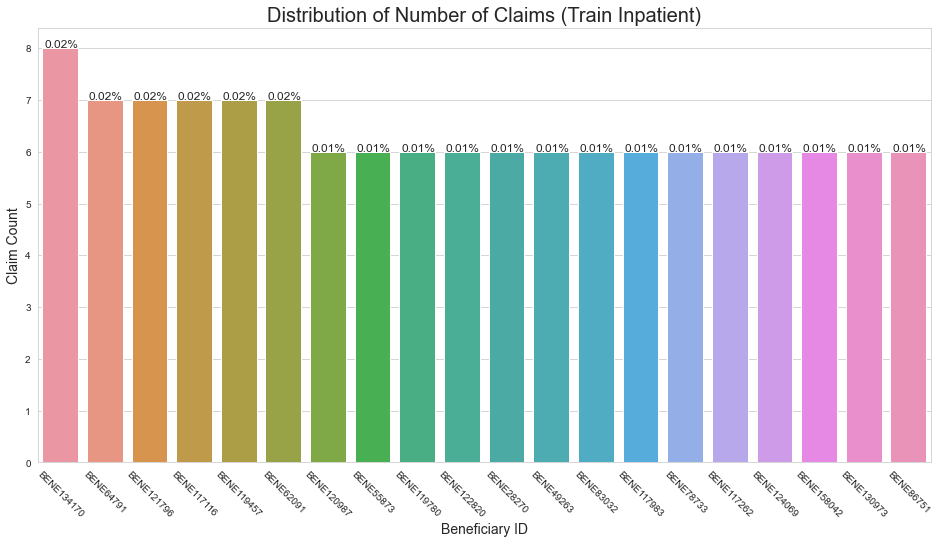

In [79]:
# Distribution of Number of Claims
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='BeneID',y=None, data=data3, orient ="v", order = data3['BeneID'].value_counts().head(20).index)
plt.title('Distribution of Number of Claims (Train Inpatient)', fontsize=20)
plt.xlabel('Beneficiary ID', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, data3['BeneID'], 0.02, 0.01, 12)

### Observation:
1. BENE134170 claimed maximum number of inpatient claims that is 8.
2. Another 5 beneficiaries claimed 7 claims, shown in the plot.

In [82]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
data3['ClaimStartDt'] = pd.to_datetime(data3['ClaimStartDt'] , format = '%Y-%m-%d')
data3['ClaimEndDt'] = pd.to_datetime(data3['ClaimEndDt'],format = '%Y-%m-%d')

datates3['ClaimStartDt'] = pd.to_datetime(datates3['ClaimStartDt'] , format = '%Y-%m-%d')
datates3['ClaimEndDt'] = pd.to_datetime(datates3['ClaimEndDt'],format = '%Y-%m-%d')

# convert AdmissionDt, DischargeDt from string to datetime format
data3['AdmissionDt'] = pd.to_datetime(data3['AdmissionDt'] , format = '%Y-%m-%d')
data3['DischargeDt'] = pd.to_datetime(data3['DischargeDt'],format = '%Y-%m-%d')

datates3['AdmissionDt'] = pd.to_datetime(datates3['AdmissionDt'] , format = '%Y-%m-%d')
datates3['DischargeDt'] = pd.to_datetime(datates3['DischargeDt'],format = '%Y-%m-%d')

In [83]:
# Calculate Hospitalization_Duration = DischargeDt - AdmissionDt
data3['Hospitalization_Duration'] = ((data3['DischargeDt'] - data3['AdmissionDt']).dt.days)+1
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
data3['Claim_Period'] = ((data3['ClaimEndDt'] - data3['ClaimStartDt']).dt.days)+1

datates3['Hospitalization_Duration'] = ((datates3['DischargeDt'] - datates3['AdmissionDt']).dt.days)+1
datates3['Claim_Period'] = ((datates3['ClaimEndDt'] - datates3['ClaimStartDt']).dt.days)+1

### If the number of days claimed for Inpatient treatment is more than no of days hospitalized is suscicious. So, I am adding this feature column.

In [85]:
# ExtraClaimDays = Claim_Period - Hospitalization_Duration
data3['ExtraClaimDays'] = np.where(data3['Claim_Period']>data3['Hospitalization_Duration'], data3['Claim_Period'] - data3['Hospitalization_Duration'], 0)
datates3['ExtraClaimDays'] = np.where(datates3['Claim_Period']>datates3['Hospitalization_Duration'], datates3['Claim_Period'] - datates3['Hospitalization_Duration'], 0)

In [86]:
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# Get the months and year of claim start and claim end
data3['ClaimStart_Year'] = data3['ClaimStartDt'].dt.year
data3['ClaimStart_Month'] = data3['ClaimStartDt'].dt.month
data3['ClaimStart_Year'] = data3['ClaimStartDt'].dt.year
data3['ClaimStart_Month'] = data3['ClaimStartDt'].dt.month

data3['ClaimEnd_Year'] = data3['ClaimEndDt'].dt.year
data3['ClaimEnd_Month'] = data3['ClaimEndDt'].dt.month
datates3['ClaimEnd_Year'] = datates3['ClaimEndDt'].dt.year
datates3['ClaimEnd_Month'] = datates3['ClaimEndDt'].dt.month

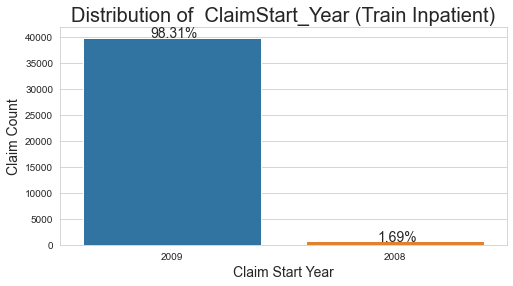

In [87]:
# Plot distribution of claim start year in Train Inpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimStart_Year',y=None, data=data3, orient ="v", order = data3['ClaimStart_Year'].value_counts().index)
plt.title('Distribution of  ClaimStart_Year (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Year', size = 14)
plt.ylabel('Claim Count', size = 14)
percentage_without_hue(ax, data3['ClaimStart_Year'], 0.01, 20,14)

### Observation:
1. For 98.3% of the patients claim started in 2009.
2. Only 1.7 % claim started in 2008

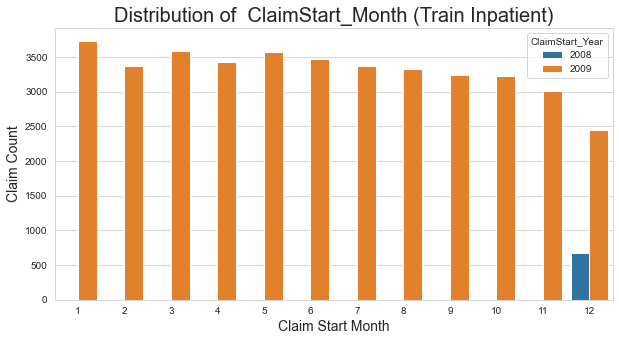

In [88]:
# Plot distribution of ClaimStart_Month in Train Inpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimStart_Month',y=None, data=data3, orient ="v", hue= 'ClaimStart_Year') #, order = Train_Inpatient['ClaimStart_Month'].value_counts().index
plt.title('Distribution of  ClaimStart_Month (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Month', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.show()

### Observation:
1. Claims are almost equally distributed accross all the months for the year 2009.
2. Claims are observed only in December for the year 2008. That means the data collected from Dec2008 to Dec2009.

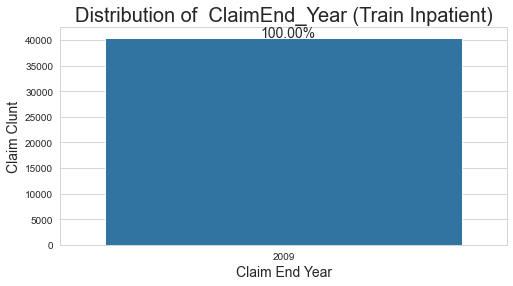

In [89]:
# Plot distribution of ClaimEnd_Year in Train_Inpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimEnd_Year',y=None, data=data3, orient ="v", order = data3['ClaimEnd_Year'].value_counts().index)
plt.title('Distribution of  ClaimEnd_Year (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Year', size = 14)
plt.ylabel('Claim Clunt', size = 14)
percentage_without_hue(ax, data3['ClaimEnd_Year'], 0.01, 20,14)

### Observation:
All the claims ended in 2009.

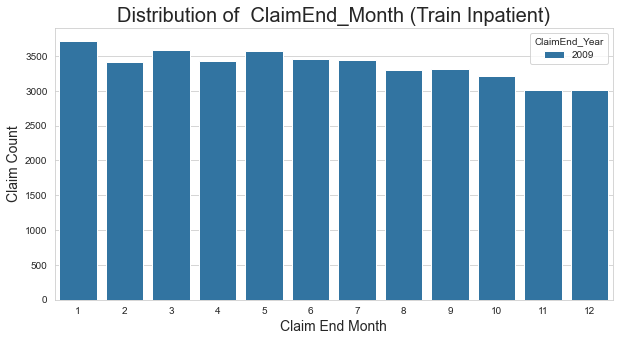

In [90]:
# Plot distribution of ClaimEnd_Month in Train_Inpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimEnd_Month',y=None, data=data3, orient ="v", hue= 'ClaimEnd_Year') #, order = Train_Inpatient['ClaimEnd_Month'].value_counts().index
plt.title('Distribution of  ClaimEnd_Month (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Month', size = 14)
plt.ylabel('Claim Count', size = 14)
plt.show()

### Observation:
All the claims ended in 2009, distributed accross all the months.

In [91]:
# Get the month and year of Admission_Year and Admission_Month
data3['Admission_Year'] = data3['AdmissionDt'].dt.year
data3['Admission_Month'] = data3['AdmissionDt'].dt.month
datates3['Admission_Year'] = datates3['AdmissionDt'].dt.year
datates3['Admission_Month'] = datates3['AdmissionDt'].dt.month

data3['Discharge_Year'] = data3['DischargeDt'].dt.year
data3['Discharge_Month'] = data3['DischargeDt'].dt.month
datates3['Discharge_Year'] = datates3['DischargeDt'].dt.year
datates3['Discharge_Month'] = datates3['DischargeDt'].dt.month

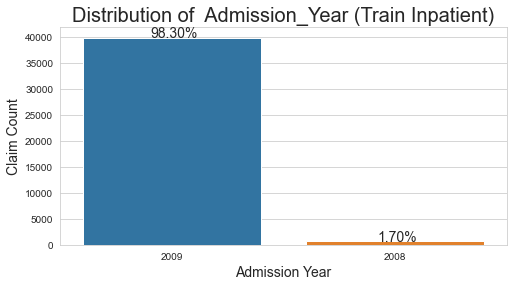

In [92]:
# Plot distribution of Admission_Year in Train_Inpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Admission_Year',y=None, data=data3, orient ="v", order = data3['Admission_Year'].value_counts().index)
plt.title('Distribution of  Admission_Year (Train Inpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Admission Year', size = 14)
plt.ylabel('Claim Count', size = 14)
percentage_without_hue(ax, data3['Admission_Year'], 0.01, 20,14)

In [93]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_IP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_IP_df['ProcedureCode'] = pd.concat([data3["ClmProcedureCode_1"], 
                                   data3["ClmProcedureCode_2"],
                                   data3["ClmProcedureCode_3"],
                                   data3["ClmProcedureCode_4"], 
                                   data3["ClmProcedureCode_5"], 
                                   data3["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

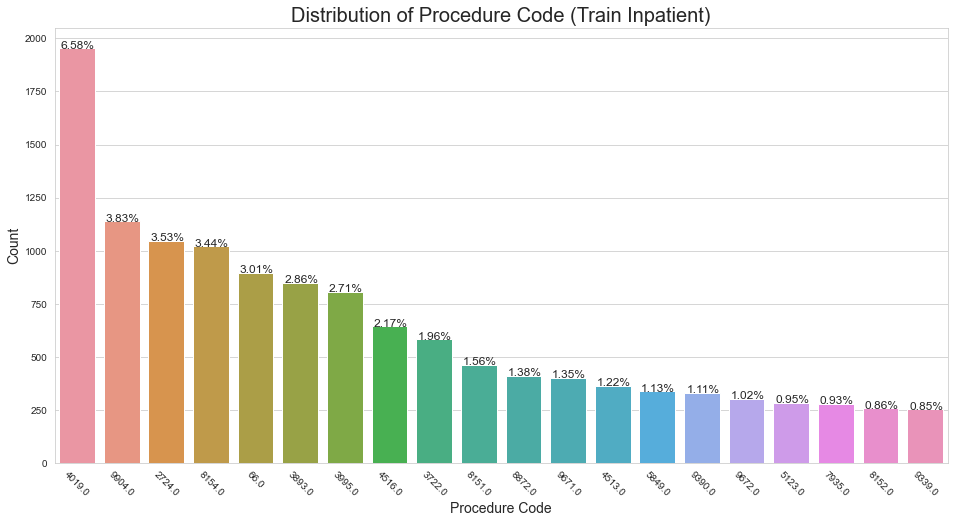

In [94]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_IP_df, orient ="v", order = ClmProcedureCode_IP_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code (Train Inpatient)', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCode_IP_df['ProcedureCode'], 0.02, 0.01, 12)

### Observation:
1. 4019, 9904, 2714, 8154, 66 are the top 5 procedures in terms of number of procedures.
2. 4019 test is done 6.5% of the total procedures.

In [95]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_IP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_IP_df['DiagnosisCode'] = pd.concat([data3["ClmDiagnosisCode_1"], 
                                           data3["ClmDiagnosisCode_2"], 
                                           data3["ClmDiagnosisCode_3"], 
                                           data3["ClmDiagnosisCode_4"],
                                           data3["ClmDiagnosisCode_5"], 
                                           data3["ClmDiagnosisCode_6"],
                                           data3["ClmDiagnosisCode_7"],
                                           data3["ClmDiagnosisCode_8"],
                                           data3["ClmDiagnosisCode_9"],
                                           data3["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

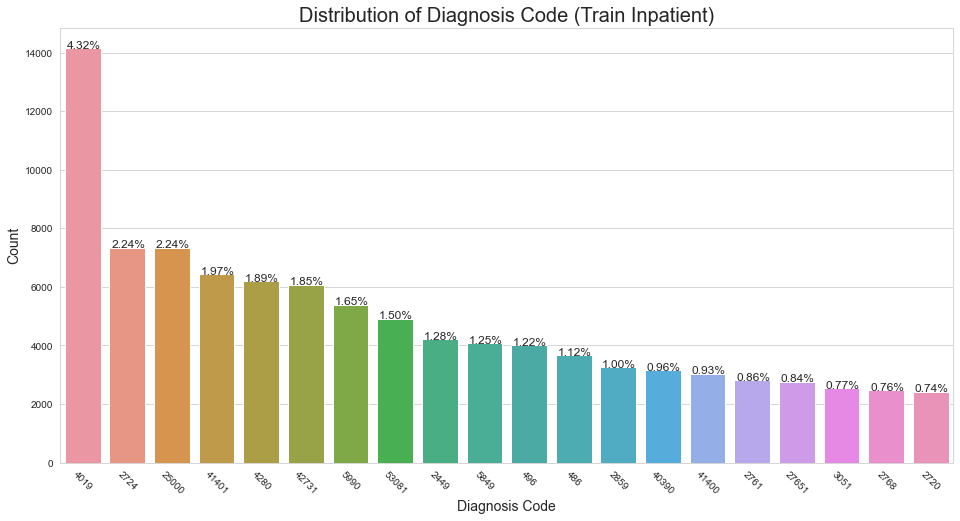

In [96]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_IP_df, orient ="v", order = ClmDiagnosisCode_IP_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code (Train Inpatient)', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmDiagnosisCode_IP_df['DiagnosisCode'], 0.02, 0.01, 12)

## Observation:
1. 4019, 2724, 25000, 41401, 4280 are the top 5 diagnosis in terms of number of diagnosos done.
2. 4019 test is done 4.3% of the total diagnosis.

## Analyze Train_Outpatient/Test_Outpatient

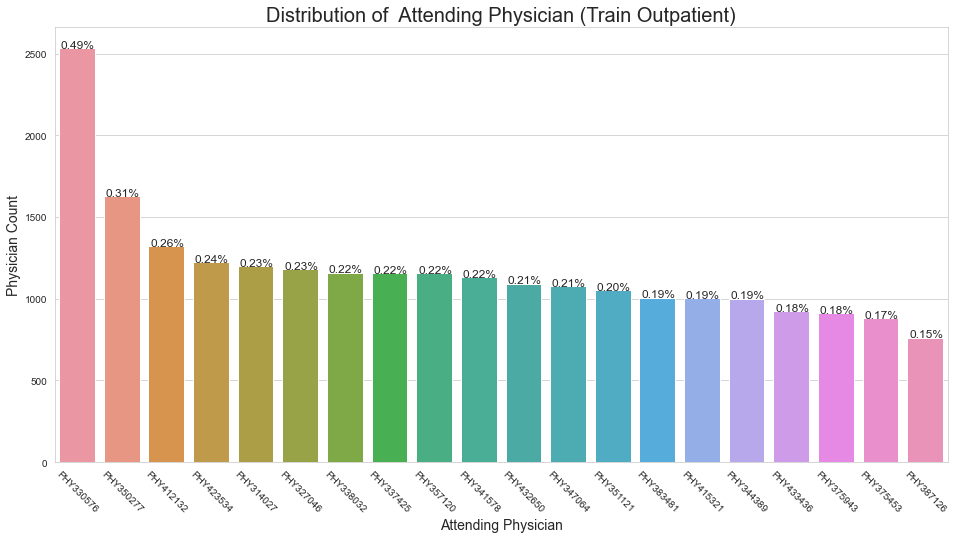

In [98]:
# Top 20 attending physician in terms of patient count
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='AttendingPhysician',y=None, data=data4, orient ="v", order = data4['AttendingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  Attending Physician (Train Outpatient)', fontsize=20)
plt.xlabel('Attending Physician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, data4['AttendingPhysician'], 0.02, 2, 12)

### Observation:
1. PHY330576, PHY350277, PHY412132, PHY423534, PHY314027 are the top 5 attending physicians in terms of number of patients visit.
2. PHY330576 treated 0.5% of the total patients.

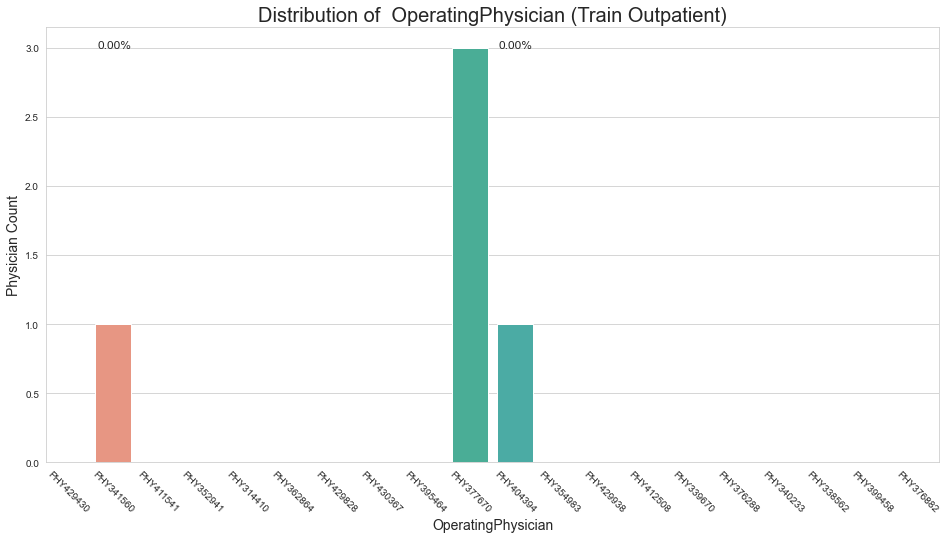

In [102]:
# Plot top 20 Operating Physician in terms of number of patients operated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OperatingPhysician',y=None, data=data4, orient ="v", order = data3['OperatingPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  OperatingPhysician (Train Outpatient)', fontsize=20)
plt.xlabel('OperatingPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, data3['OperatingPhysician'], 0.02, 2, 12)

### Observation:
1. PHY330576, PHY424897, PHY314027, PHY423534, PHY357120 are the top 5 operating physicians in terms of number of patients operation.
2. PHY330576 operated 0.08% of the total patients.

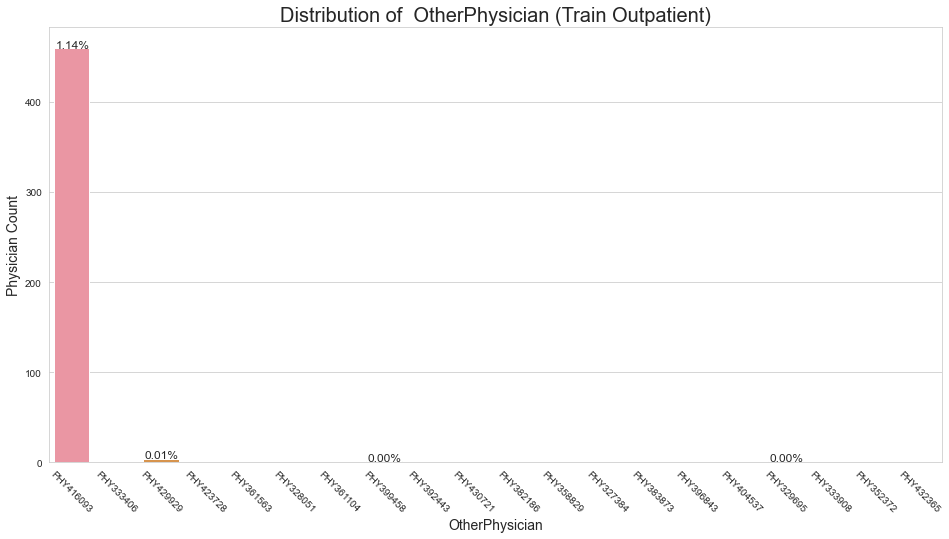

In [101]:
# Plot top 20 Other Physician in terms of number of patients treated
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='OtherPhysician',y=None, data=data4, orient ="v", order = data3['OtherPhysician'].value_counts().iloc[:20].index)
plt.title('Distribution of  OtherPhysician (Train Outpatient)', fontsize=20)
plt.xlabel('OtherPhysician', size = 14)
plt.ylabel('Physician Count', size = 14)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, data3['OtherPhysician'], 0.02, 0, 12)

### Observation:
1. PHY412132, PHY341578, PHY338032, PHY337425, PHY347064 are the top 5 other physicians in terms of number of patients visit

In [103]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
data4['ClaimStartDt'] = pd.to_datetime(data4['ClaimStartDt'] , format = '%Y-%m-%d')
data4['ClaimEndDt'] = pd.to_datetime(data4['ClaimEndDt'],format = '%Y-%m-%d')

datates4['ClaimStartDt'] = pd.to_datetime(datates4['ClaimStartDt'] , format = '%Y-%m-%d')
datates4['ClaimEndDt'] = pd.to_datetime(datates4['ClaimEndDt'],format = '%Y-%m-%d')

In [104]:
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# Get the months and year of claim start and claim end
data4['ClaimStart_Year'] = data4['ClaimStartDt'].dt.year
data4['ClaimStart_Month'] = data4['ClaimStartDt'].dt.month
datates4['ClaimStart_Year'] = datates4['ClaimStartDt'].dt.year
datates4['ClaimStart_Month'] = datates4['ClaimStartDt'].dt.month

data4['ClaimEnd_Year'] = data4['ClaimEndDt'].dt.year
data4['ClaimEnd_Month'] = data4['ClaimEndDt'].dt.month
datates4['ClaimEnd_Year'] = datates4['ClaimEndDt'].dt.year
datates4['ClaimEnd_Month'] = datates4['ClaimEndDt'].dt.month

In [105]:
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
data4['Claim_Period'] = ((data4['ClaimEndDt'] - data4['ClaimStartDt']).dt.days)+1

datates4['Claim_Period'] = ((datates4['ClaimEndDt'] - datates4['ClaimStartDt']).dt.days)+1

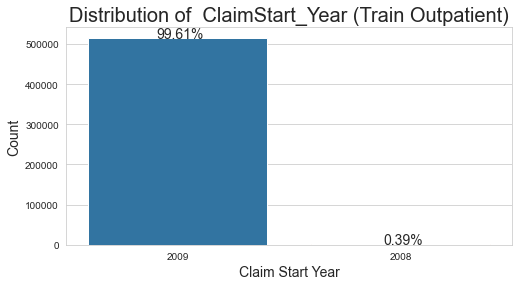

In [106]:
# Plot distribution of claim start year in Train Outpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimStart_Year',y=None, data=data4, orient ="v", order = data4['ClaimStart_Year'].value_counts().index)
plt.title('Distribution of  ClaimStart_Year (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Year', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, data4['ClaimStart_Year'], 0.01, 20,14)

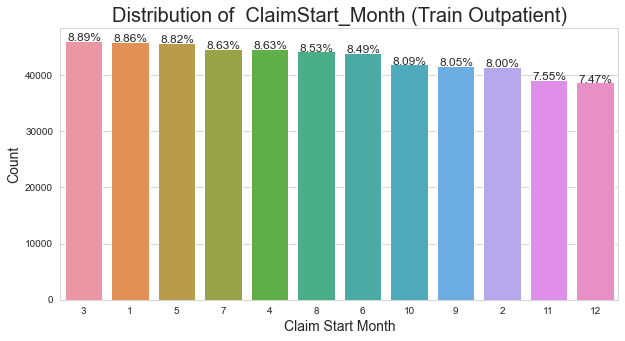

In [107]:
# Plot distribution of ClaimStart_Month in Train Inpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimStart_Month',y=None, data=data4, orient ="v", order = data4['ClaimStart_Month'].value_counts().index)
plt.title('Distribution of  ClaimStart_Month (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Month', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, data4['ClaimStart_Month'], 0.01, 20,12)

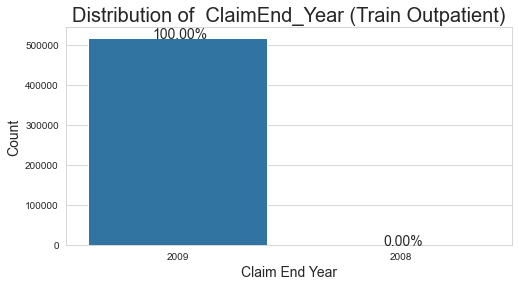

In [108]:
# Plot distribution of ClaimEnd_Year in Train_Outpatient data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimEnd_Year',y=None, data=data4, orient ="v", order = data4['ClaimEnd_Year'].value_counts().index)
plt.title('Distribution of  ClaimEnd_Year (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Year', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, data4['ClaimEnd_Year'], 0.01, 20,14)

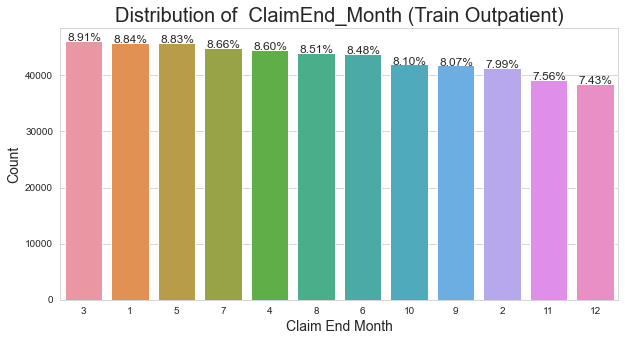

In [109]:
# Plot distribution of ClaimEnd_Month in Train_Outpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimEnd_Month',y=None, data=data4, orient ="v", order = data4['ClaimEnd_Month'].value_counts().index)
plt.title('Distribution of  ClaimEnd_Month (Train Outpatient)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Month', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, data4['ClaimEnd_Month'], 0.01, 20,12)

### Observation:
1. 99.6% claims started in 2009 only 0.4% claim started in 2008
2. Distribution of claim start year is uniform.
3. All the claims ended in 2009, distributed accross all the months.

In [110]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_OP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_OP_df['ProcedureCode'] = pd.concat([data4["ClmProcedureCode_1"], 
                                   data4["ClmProcedureCode_2"],
                                   data4["ClmProcedureCode_3"],
                                   data4["ClmProcedureCode_4"], 
                                   data4["ClmProcedureCode_5"], 
                                   data4["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

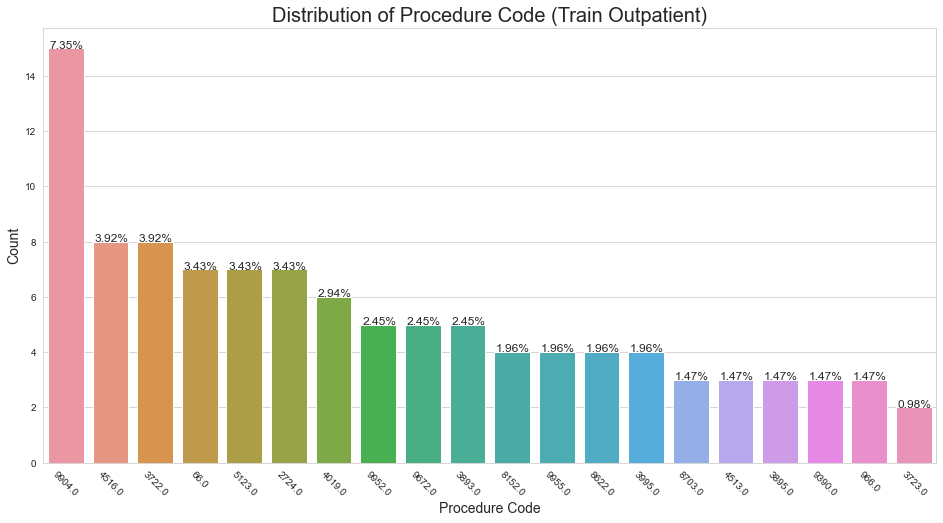

In [111]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_OP_df, orient ="v", order = ClmProcedureCode_OP_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code (Train Outpatient)', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCode_OP_df['ProcedureCode'], 0.02, 0.01, 12)

### Observation:
1. Top 20 ProcedureCodes are shown in the plot.
2. Procedure 9904 was done 7.35% of total procedures done.

In [112]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_OP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_OP_df['DiagnosisCode'] = pd.concat([data4["ClmDiagnosisCode_1"], 
                                           data4["ClmDiagnosisCode_2"], 
                                           data4["ClmDiagnosisCode_3"], 
                                           data4["ClmDiagnosisCode_4"],
                                           data4["ClmDiagnosisCode_5"], 
                                           data4["ClmDiagnosisCode_6"],
                                           data4["ClmDiagnosisCode_7"],
                                           data4["ClmDiagnosisCode_8"],
                                           data4["ClmDiagnosisCode_9"],
                                           data4["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

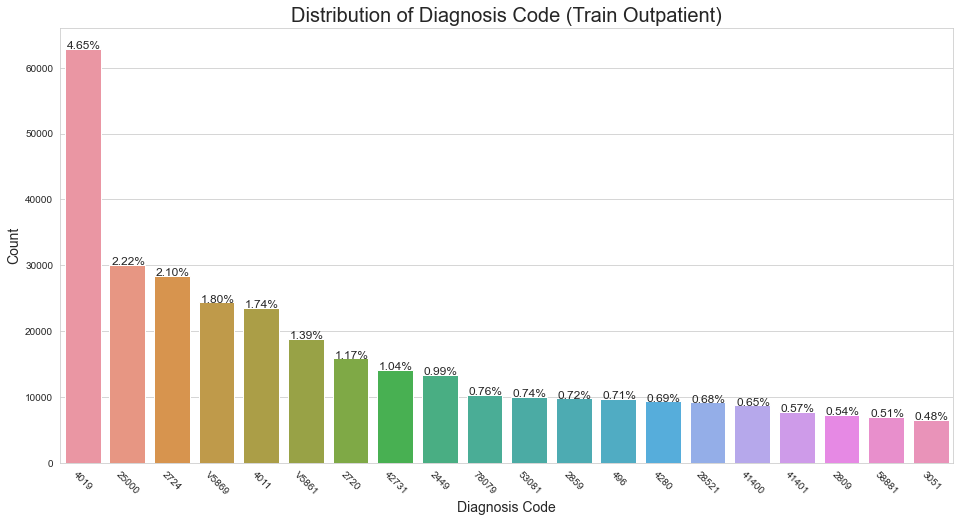

In [113]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_OP_df, orient ="v", order = ClmDiagnosisCode_OP_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code (Train Outpatient)', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmDiagnosisCode_OP_df['DiagnosisCode'], 0.02, 0.01, 12)

### Observation:
1. Top 20 DiagnosisCodes are shown in the plot.
2. Procedure 4019 was done 4.65% of total procedures done.

## MERGE DATASET

In [114]:
data4.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Claim_Period'],
      dtype='object')

In [115]:
# Create a new column Inpatient_or_Outpatient where Inpatient =1 and Outpatient = 0
data3['Inpatient_or_Outpatient'] = 1
data4['Inpatient_or_Outpatient'] = 0
datates3['Inpatient_or_Outpatient'] = 1
datates4['Inpatient_or_Outpatient'] = 0

### Merge Inpatient and Outpatient Data
 Peneliti memuat daftar kolom yang terdapat pada kedua data frame, yaitu kolom-kolom yang ada di data4 dan juga terdapat di data3

In [118]:
# Merge inpatient and outpatient dataframes based on common columns
common_columns = [ idx for idx in data4.columns if idx in data3.columns]
print(common_columns)
Inpatient_Outpatient_Merge = pd.merge(data3, data4, left_on = common_columns, right_on = common_columns,how = 'outer')

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'ClaimStart_Year', 'ClaimStart_Month', 'ClaimEnd_Year', 'ClaimEnd_Month', 'Claim_Period', 'Inpatient_or_Outpatient']


In [119]:
# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge = pd.merge(Inpatient_Outpatient_Merge, data2,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

# Merge provider details
Final_Dataset_Train = pd.merge(Inpatient_Outpatient_Beneficiary_Merge, data1 , how = 'inner', on = 'Provider' )

In [120]:
# Merge inpatient and outpatient dataframes based on common columns

common_columns_test = [ idx for idx in datates4.columns if idx in datates3.columns]
Inpatient_Outpatient_Merge_Te = pd.merge(datates4, datates3, left_on = common_columns_test, right_on = common_columns_test,how = 'outer')

# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge_Te = pd.merge(Inpatient_Outpatient_Merge_Te, datates2,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

Final_Dataset_Test = pd.merge(Inpatient_Outpatient_Beneficiary_Merge_Te, datates1 , how = 'inner', on = 'Provider' )

In [121]:
Final_Dataset_Train.shape

(558211, 69)

In [122]:
Final_Dataset_Train.head(2)

BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE11001   CLM46614   2009-04-12 2009-04-18  PRV55912   
1  BENE16973  CLM565430   2009-09-06 2009-09-06  PRV55912   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                      50          PHY365867          PHY327147   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN         NaT                   NaN                0.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1         NaT                NaN              V7183              53081   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              78959               4280              E8788              78079   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1              79902              25002              71848   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  Hospitalization_Duration  Claim_Period  ExtraClaimDays  \
0                 NaN                       7.0             7             0.0   
1                 NaN                       NaN             1             NaN   

   ClaimStart_Year  ClaimStart_Month  ClaimEnd_Year  ClaimEnd_Month  \
0             2009                 4           2009               4   
1             2009                 9           2009               9   

   Admission_Year  Admission_Month  Discharge_Year  Discharge_Month  \
0          2009.0              4.0          2009.0              4.0   
1             NaN              NaN             NaN              NaN   

   Inpatient_or_Outpatient        DOB DOD  Gender  Race  \
0                        1 1943-01-01 NaT       1     1   
1                        0 1932-05-01 NaT       1     1   

   RenalDiseaseIndicator  State  County  NoOfMonths_PartACov  \
0                      0     39     230                   12   
1                      0     39     310                   12   

   NoOfMonths_PartBCov  ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
0                   12                      1                         0   
1                   12                      1                         1   

   ChronicCond_KidneyDisease  ChronicCond_Cancer  ChronicCond_ObstrPulmonary  \
0                          1                   0                           0   
1                          1                   0                           0   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       0                     0                          1   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         0                                1   
1                         0                                0   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   0                     24000                   2136   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  Birth_Year  Birth_Month  \
0                        60                     70        1943            1   
1                       450        

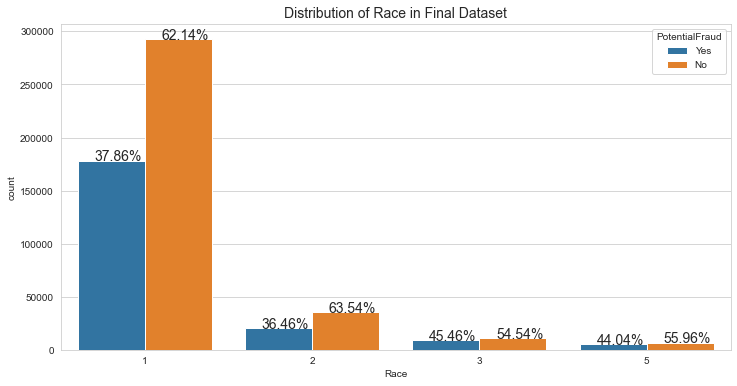

In [123]:
# Distribution of race in Overall data
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Race',y=None, data=Final_Dataset_Train, hue="PotentialFraud", orient ="v",hue_order=['Yes','No'], order = Final_Dataset_Train['Race'].value_counts().index)
plt.title('Distribution of Race in Final Dataset', size = 14)
percentage_with_hue(ax, Final_Dataset_Train.Race, 4,2,-0.1,200, 14)

### Observation:
1. Total number of transactions are more for Race 1, 37.8% are fraudulent out of them.
2. The ratio of fraudulent transaction is most for Race 3 (45.5%)
3. So, race is an important feature in fraud detection.

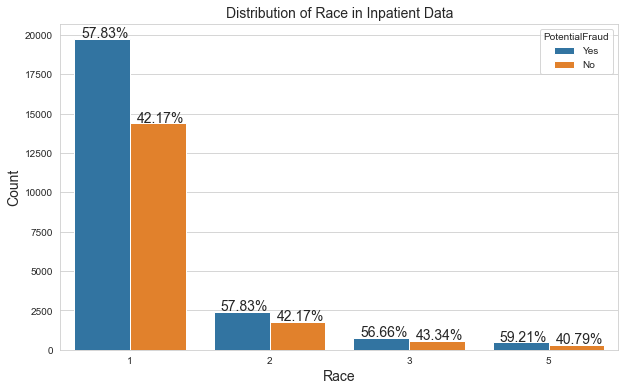

In [124]:
# Distribution of race in Inpatient Data
plt.figure(figsize=(10, 6))
Data = Final_Dataset_Train[Final_Dataset_Train.Inpatient_or_Outpatient == 1]
order = Final_Dataset_Train.Race.value_counts().index
ax = sns.countplot(x='Race',y=None, data=Data, hue= "PotentialFraud", orient ="v", order = order) #hue_order=['No','Yes'],
plt.title('Distribution of Race in Inpatient Data', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Race', size = 14)
plt.ylabel('Count', size = 14)
percentage_with_hue(ax, Data.Race, 4,2,-0.15,80, 14)

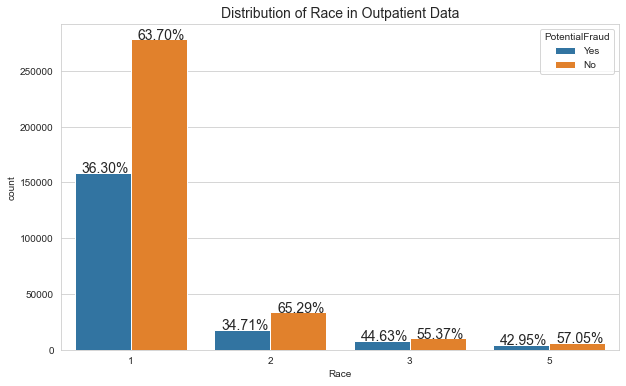

In [125]:
# Distribution of race in Inpatient Data
plt.figure(figsize=(10, 6))
Data = Final_Dataset_Train[Final_Dataset_Train.Inpatient_or_Outpatient == 0]
order = Final_Dataset_Train.Race.value_counts().index
ax = sns.countplot(x='Race',y=None, data=Data, hue= "PotentialFraud", orient ="v", order = order) #hue_order=['No','Yes'],
plt.title('Distribution of Race in Outpatient Data', size = 14)
percentage_with_hue(ax, Data.Race, 4,2,-0.15,200, 14)

### Observation:
1. When inpatient and outpatient data is analyzed separetely it is observed that the percentage of fraudulent activity is more in Inpatient Data compared to Outpatient Data. This may be because of more money associated in inpatient claims.
2. In Inpatient data, Race 5 has highest percentage of fraudulent activity(59.21%)
3. In outpatient data Race 3 has highest percentage of fraudulent activity(44.63%)

In [126]:
Total_number_of_inpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].count()
Total_number_of_inpatient_claims     

40474

In [127]:
#Calculatinng total and percentage money lost for Inpatient
Total_number_of_inpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].count()
Total_Money_Fraud_Inpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1) & (Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent_Inpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].sum()
print("Total_Money_Spent_Inpatient : ",Total_Money_Spent_Inpatient)
print('Average reimbursed amount per patient :' , round(Total_Money_Spent_Inpatient/Total_number_of_inpatient_claims))
print("Total_Money_Fraud_Inpatient : ",Total_Money_Fraud_Inpatient)
print("Percentage of money spent in fraud for Inpatient = {:.2f}%".format(Total_Money_Fraud_Inpatient/Total_Money_Spent_Inpatient *100))

Total_Money_Spent_Inpatient :  408297020
Average reimbursed amount per patient : 10088
Total_Money_Fraud_Inpatient :  241288510
Percentage of money spent in fraud for Inpatient = 59.10%


In [128]:
#Calculatinng total and percentage money lost for Outpatient
Total_number_of_Outpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0)].count()
Total_Money_Fraud_Outpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0) & (Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent_Outpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0)].sum()
print("Total_Money_Spent_Outpatient : ",Total_Money_Spent_Outpatient)
print('Average reimbursed amount per patient :' , round(Total_Money_Spent_Outpatient/Total_number_of_Outpatient_claims))
print("Total_Money_Fraud_Outpatient : ",Total_Money_Fraud_Outpatient)
print("Percentage of money spent in fraud for Outpatient = {:.2f}%".format(Total_Money_Fraud_Outpatient/Total_Money_Spent_Outpatient *100))

Total_Money_Spent_Outpatient :  148246120
Average reimbursed amount per patient : 286
Total_Money_Fraud_Outpatient :  54392610
Percentage of money spent in fraud for Outpatient = 36.69%


In [129]:
#Calculatinng total and percentage money lost for overall data
Total_Money_Fraud = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent = Final_Dataset_Train.InscClaimAmtReimbursed.sum()
print("Total_Money_Spent : ",Total_Money_Spent)
print("Total_Money_Fraud : ",Total_Money_Fraud)
print("Percentage of money spent in fraud = {:.2f}%".format(Total_Money_Fraud/Total_Money_Spent *100))

Total_Money_Spent :  556543140
Total_Money_Fraud :  295681120
Percentage of money spent in fraud = 53.13%


### Observation:
1. Percentage of fraudulent activity is more in inpatient data this is because the average reimbursement amount for inpatient data(10088) is 35 times more than the average reimbursement amount(286) for outpatient.
2. Amount 295681120 is wasted for fraudulent transaction which is 53% of the total reimbursement amount(556543140)

In [131]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_df['ProcedureCode'] = pd.concat([Final_Dataset_Train["ClmProcedureCode_1"], 
                                   Final_Dataset_Train["ClmProcedureCode_2"],
                                   Final_Dataset_Train["ClmProcedureCode_3"],
                                   Final_Dataset_Train["ClmProcedureCode_4"], 
                                   Final_Dataset_Train["ClmProcedureCode_5"], 
                                   Final_Dataset_Train["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

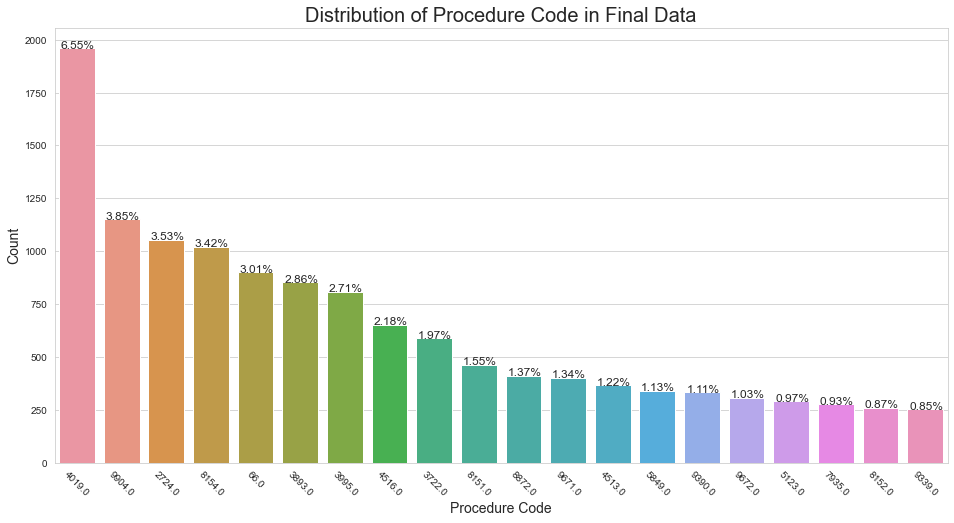

In [132]:
# Plot the countplot for claim precedure codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCode_df, orient ="v", order = ClmProcedureCode_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code in Final Data', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCode_df['ProcedureCode'], 0.02, 0.01, 12)

### Observation:
1. Top 20 procedure codes are shown in the plot.
2. 4019 test is done 6.5% of the total procedures.

In [133]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_df['DiagnosisCode'] = pd.concat([Final_Dataset_Train["ClmDiagnosisCode_1"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_2"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_3"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_4"],
                                           Final_Dataset_Train["ClmDiagnosisCode_5"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_6"],
                                           Final_Dataset_Train["ClmDiagnosisCode_7"],
                                           Final_Dataset_Train["ClmDiagnosisCode_8"],
                                           Final_Dataset_Train["ClmDiagnosisCode_9"],
                                           Final_Dataset_Train["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

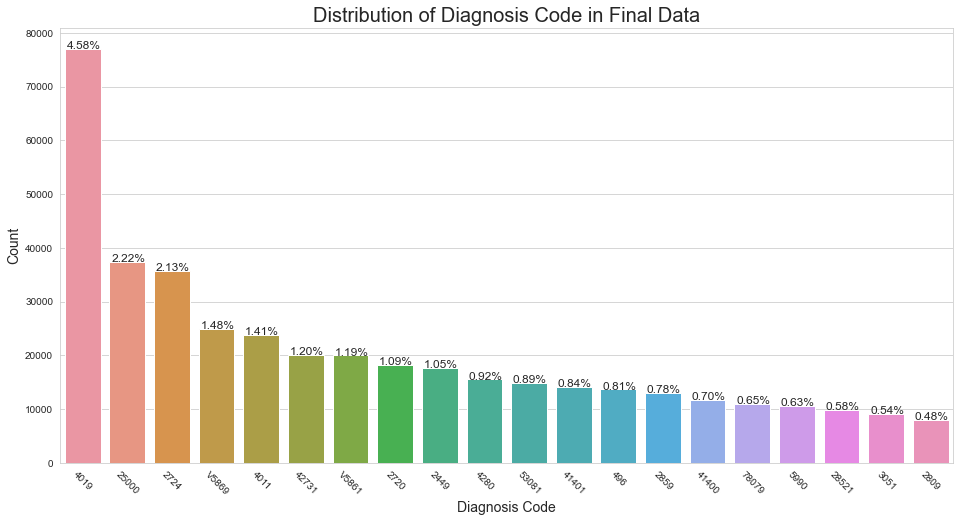

In [134]:
# Plot the countplot for claim diagnosis codes (Top 20)
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='DiagnosisCode',y=None, data=ClmDiagnosisCode_df, orient ="v", order = ClmDiagnosisCode_df['DiagnosisCode'].value_counts().head(20).index)
plt.title('Distribution of Diagnosis Code in Final Data', fontsize=20)
plt.xlabel('Diagnosis Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmDiagnosisCode_df['DiagnosisCode'], 0.02, 0.01, 12)

### Observation:
1. Top 20 diagnosis codes are shown in the plot.
2. 4019 diagnosis is done 4.5% of the total diagnosis.

In [135]:
# Separate dataframe with fraud only
Final_Dataset_Fraud_Train = Final_Dataset_Train[Final_Dataset_Train.PotentialFraud == 'Yes']
ClmProcedureCodeFraud_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCodeFraud_df['ProcedureCode'] = pd.concat([Final_Dataset_Fraud_Train["ClmProcedureCode_1"], 
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_2"],
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_3"],
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_4"], 
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_5"], 
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

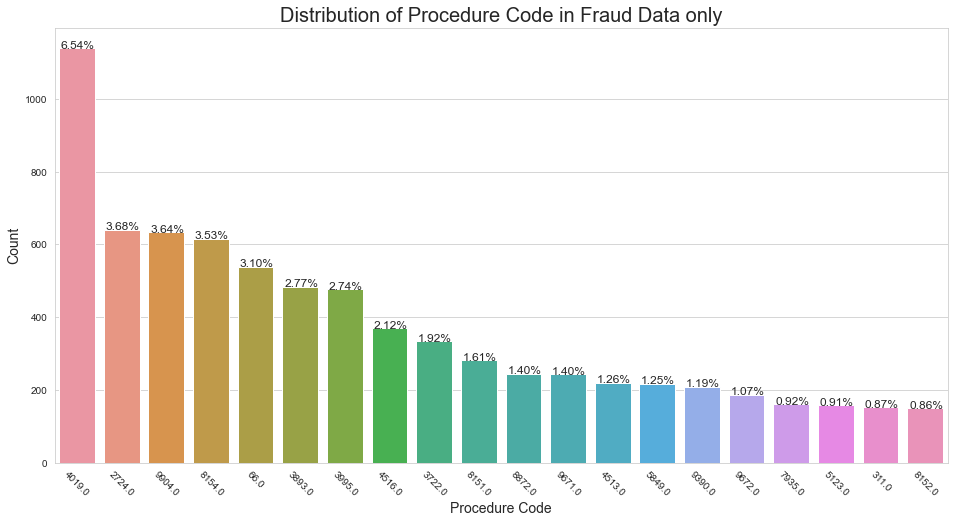

In [136]:
# Plot the countplot for claim diagnosis codes (Top 20) only for fraud data
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='ProcedureCode',y=None, data=ClmProcedureCodeFraud_df, orient ="v", order = ClmProcedureCodeFraud_df['ProcedureCode'].value_counts().head(20).index)
plt.title('Distribution of Procedure Code in Fraud Data only', fontsize=20)
plt.xlabel('Procedure Code', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(rotation=-45)
plt.yticks(size=10)
plt.xticks(rotation=-45, size=10)
percentage_without_hue(ax, ClmProcedureCodeFraud_df['ProcedureCode'], 0.02, 0.01, 12)

###Observation:
1. Top 20 diagnosis codes only for fraud data are shown in the plot.
2. 4019 diagnosis is done 6.5% of the total fraud diagnosis.

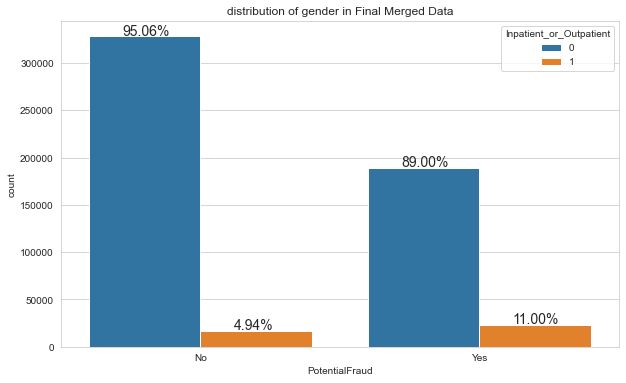

In [137]:
# Plot distribution of gender in Final Merged Data
plt.figure(figsize=(10,6))
ax = sns.countplot(x='PotentialFraud',data=Final_Dataset_Train, hue = 'Inpatient_or_Outpatient', order = Final_Dataset_Train['PotentialFraud'].value_counts().index)
# plt.xticks(size = 10)
# plt.yticks(size = 10)
# plt.title('Distribution of  Gender', fontsize=20)
# plt.xlabel('Gender', size = 14)
# plt.ylabel('Count', size = 14)
plt.title('distribution of gender in Final Merged Data')
percentage_with_hue(ax, Final_Dataset_Train['PotentialFraud'], 2,2,-0.08,1000, 14)

### Observation:
1. Out of total fraudulent activities 89% comes from outpatient claim and 11% from inpatient claims in terms of claim count.

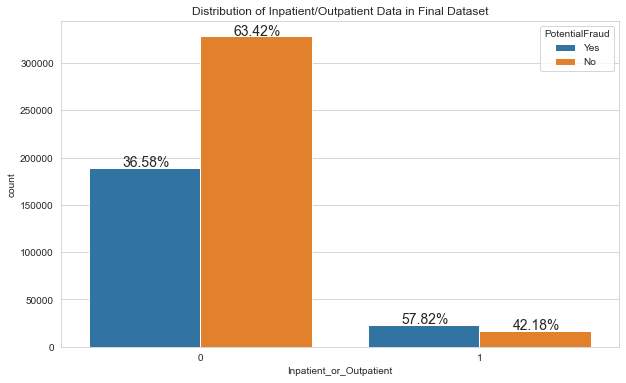

In [139]:
# Plot distribution of gender in Beneficiaries data
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Inpatient_or_Outpatient',data=Final_Dataset_Train, hue = 'PotentialFraud', order = Final_Dataset_Train['Inpatient_or_Outpatient'].value_counts().index)
plt.title('Distribution of Inpatient/Outpatient Data in Final Dataset')
percentage_with_hue(ax, Final_Dataset_Train['Inpatient_or_Outpatient'], 2,2,-0.08,1000, 14)

### Observation:
1. The number of claims are less for inpatient data compared to outpatient data.
2. Even though the claims are less in inpatient data, percentage of fraudulent activity is more in inpatient data(57.8%) whereas it is 36.5% in outpatient data. This is beacuse per claim reimbursement amount for inpatient is much higher(35 times calculated earlier) than the per claim reimbursement amount of outpatient

C:\Users\sumaa\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\sumaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sumaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


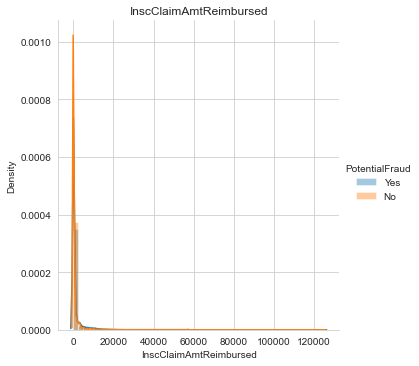

In [140]:
#Histogram of InscClaimAmtReimbursed
sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud", size=5) \
   .map(sns.distplot, "InscClaimAmtReimbursed") \
   .add_legend();
# plt.xlim(-1000,20000)
plt.title('InscClaimAmtReimbursed')
plt.show();

C:\Users\sumaa\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\sumaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sumaa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


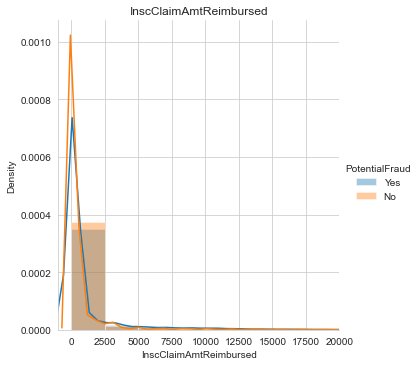

In [141]:
#Histogram of InscClaimAmtReimbursed
sns.FacetGrid(Final_Dataset_Train, hue="PotentialFraud", size=5) \
   .map(sns.distplot, "InscClaimAmtReimbursed") \
   .add_legend();
plt.xlim(-1000,20000)
plt.title('InscClaimAmtReimbursed')
plt.show();

### Observation:
1. From the PDF and histogram of claim amount reimbursed we can observe that when the claim amount is less, the number of fraud claims are much higher compared to legitimate claims.
2. For higher amounts also fraudulent count is little higher.

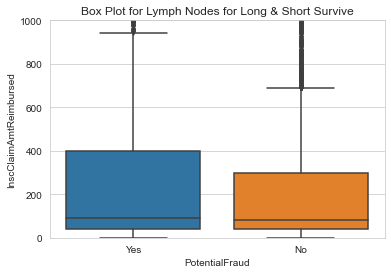

In [142]:
#Box Plot for InscClaimAmtReimbursed
sns.boxplot(x='PotentialFraud',y='InscClaimAmtReimbursed', data=Final_Dataset_Train)
plt.ylim(0,1000)
plt.title('Box Plot for Lymph Nodes for Long & Short Survive')
plt.show()

### Observation:
1. 25th, 50th percentiles are very less for claim amount reimbursed.
2. 75th percentile for fraudulent claims is higher than the legitimate claims

In [147]:
# create new feature total reimbursement amount for inpatient and outpatient
Final_Dataset_Train['IP_OP_TotalReimbursementAmt'] = Final_Dataset_Train['IPAnnualReimbursementAmt'] + Final_Dataset_Train['OPAnnualReimbursementAmt']
# create new feature total deductible amount for inpatient and outpatient
Final_Dataset_Train['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Train['IPAnnualDeductibleAmt'] + Final_Dataset_Train['OPAnnualDeductibleAmt']

Final_Dataset_Test['IP_OP_TotalReimbursementAmt'] = Final_Dataset_Test['IPAnnualReimbursementAmt'] + Final_Dataset_Test['OPAnnualReimbursementAmt']
Final_Dataset_Test['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Test['IPAnnualDeductibleAmt'] + Final_Dataset_Test['OPAnnualDeductibleAmt']

C:\Users\sumaa\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


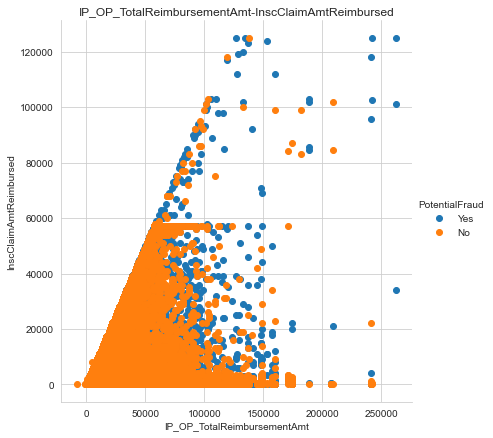

In [148]:
#Scatter Plot- IP_OP_TotalReimbursementAmt vs InscClaimAmtReimbursed
sns.set_style("whitegrid")
sns.FacetGrid(Final_Dataset_Train, hue='PotentialFraud', size=6)\
    .map(plt.scatter, "IP_OP_TotalReimbursementAmt", "InscClaimAmtReimbursed")\
    .add_legend();
plt.title('IP_OP_TotalReimbursementAmt-InscClaimAmtReimbursed')
plt.show();

### Observation:
1. If InscClaimAmtReimbursed>10000 and IP_OP_TotalReimbursementAmt>120000 then the chance to be a fraudulent transaction is high.

C:\Users\sumaa\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


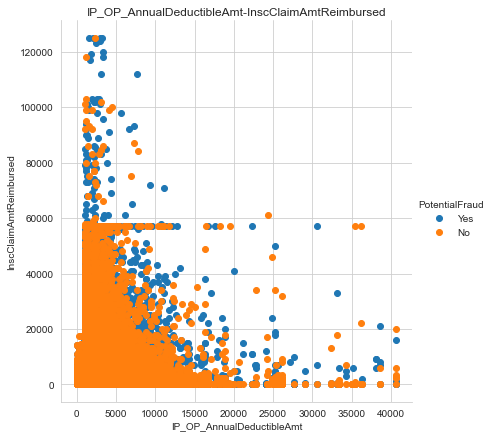

In [149]:
#Scatter Plot- IP_OP_AnnualDeductibleAmt vs InscClaimAmtReimbursed
sns.set_style("whitegrid")
sns.FacetGrid(Final_Dataset_Train, hue='PotentialFraud', size=6)\
    .map(plt.scatter, "IP_OP_AnnualDeductibleAmt", "InscClaimAmtReimbursed")\
    .add_legend()
plt.title('IP_OP_AnnualDeductibleAmt-InscClaimAmtReimbursed')
plt.show()

### Observation:
1. If InscClaimAmtReimbursed>600000 and IP_OP_AnnualDeductibleAmt<5000 then the chance to be a fraudulent transaction is high.

In [150]:
Final_Dataset_Train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month', 'Inpatient_or_Outpatient', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State

In [151]:
len(Final_Dataset_Train.columns)

71

In [152]:
Final_Dataset_Train.head(2)

BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE11001   CLM46614   2009-04-12 2009-04-18  PRV55912   
1  BENE16973  CLM565430   2009-09-06 2009-09-06  PRV55912   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                      50          PHY365867          PHY327147   

  OtherPhysician AdmissionDt ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0            NaN  2009-04-12                  7866             1068.0   
1            NaN         NaT                   NaN                0.0   

  DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0  2009-04-18                201               1970               4019   
1         NaT                NaN              V7183              53081   

  ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5 ClmDiagnosisCode_6  \
0               5853               7843               2768              71590   
1              78959               4280              E8788              78079   

  ClmDiagnosisCode_7 ClmDiagnosisCode_8 ClmDiagnosisCode_9  \
0               2724              19889               5849   
1              79902              25002              71848   

  ClmDiagnosisCode_10  ClmProcedureCode_1  ClmProcedureCode_2  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   

   ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   

   ClmProcedureCode_6  Hospitalization_Duration  Claim_Period  ExtraClaimDays  \
0                 NaN                       7.0             7             0.0   
1                 NaN                       NaN             1             NaN   

   ClaimStart_Year  ClaimStart_Month  ClaimEnd_Year  ClaimEnd_Month  \
0             2009                 4           2009               4   
1             2009                 9           2009               9   

   Admission_Year  Admission_Month  Discharge_Year  Discharge_Month  \
0          2009.0              4.0          2009.0              4.0   
1             NaN              NaN             NaN              NaN   

   Inpatient_or_Outpatient        DOB DOD  Gender  Race  \
0                        1 1943-01-01 NaT       1     1   
1                        0 1932-05-01 NaT       1     1   

   RenalDiseaseIndicator  State  County  NoOfMonths_PartACov  \
0                      0     39     230                   12   
1                      0     39     310                   12   

   NoOfMonths_PartBCov  ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
0                   12                      1                         0   
1                   12                      1                         1   

   ChronicCond_KidneyDisease  ChronicCond_Cancer  ChronicCond_ObstrPulmonary  \
0                          1                   0                           0   
1                          1                   0                           0   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       0                     0                          1   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         0                                1   
1                         0                                0   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   0                     24000                   2136   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  Birth_Year  Birth_Month  \
0                        60                     70        1943            1   
1                       450        

## Missing value imputation

In [153]:
# https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe
# find the columns which contain null values
Final_Dataset_Train.columns[Final_Dataset_Train.isnull().any()].tolist()

['AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'AdmissionDt',
 'ClmAdmitDiagnosisCode',
 'DeductibleAmtPaid',
 'DischargeDt',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'Hospitalization_Duration',
 'ExtraClaimDays',
 'Admission_Year',
 'Admission_Month',
 'Discharge_Year',
 'Discharge_Month',
 'DOD']

1. 'AttendingPhysician','OperatingPhysician','OtherPhysician', which all are NaN I will fill with Zero.
2. Missing diagnosis code and procedure codes also I will fill with Zero
3. Admision datte and period is not applicable for outpatient data, fill with zero.
4. DOD is not applicable for alive beneficiaries.
5. So, I will fill all these missing values with zero

In [154]:
## Fill missing results using 0
Final_Dataset_Train = Final_Dataset_Train.fillna(0).copy()
Final_Dataset_Test = Final_Dataset_Test.fillna(0).copy()

In [155]:
Final_Dataset_Train.isna().sum().sum()

0

In [156]:
Final_Dataset_Test.isna().sum().sum()

0

So, there is no null value in the whole dataset.

## Feature Engineering

In [157]:
def create_feature_using_groupby(Train_df, Test_df, gruopby_col, operation_col,operation):
    '''
    This function groupby the 'Train_df' and 'Test_df' dataframe by 'gruopby_col' and performs 'operation' on 'operation_col'
    '''
    
    for col in operation_col:
        # create new column name for the dataframe
        new_col_name = 'Per'+''.join(gruopby_col)+'_'+operation+'_'+col
        print(new_col_name)
        Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
        Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
    return Train_df, Test_df

As Providers fills and submits the claim they are mainly associated with the fraudulent activity. So, I will group by provider and take the mean of reimbursed, deducted etc. If average claim amount or claim period is high for a provider, this is suspicious

In [160]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt','NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test = create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['Provider'], columns, 'mean')

PerProvider_mean_InscClaimAmtReimbursed
PerProvider_mean_DeductibleAmtPaid
PerProvider_mean_IPAnnualReimbursementAmt
PerProvider_mean_IPAnnualDeductibleAmt
PerProvider_mean_OPAnnualReimbursementAmt
PerProvider_mean_OPAnnualDeductibleAmt
PerProvider_mean_NoOfMonths_PartACov
PerProvider_mean_NoOfMonths_PartBCov
PerProvider_mean_Hospitalization_Duration
PerProvider_mean_Claim_Period


Beneficiaries also associated with fraudulent activity. So, group by the dataframe by Beneficiary Id and take mean. If average claim amount is high for a beneficiary then rhis is suspicious.

In [161]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['BeneID'], columns, 'mean')

PerBeneID_mean_InscClaimAmtReimbursed
PerBeneID_mean_DeductibleAmtPaid
PerBeneID_mean_IPAnnualReimbursementAmt
PerBeneID_mean_IPAnnualDeductibleAmt
PerBeneID_mean_OPAnnualReimbursementAmt
PerBeneID_mean_OPAnnualDeductibleAmt
PerBeneID_mean_Hospitalization_Duration
PerBeneID_mean_Claim_Period


Physicians are also associated with fraudulent activity. So, group by AttendingPhysician, OperatingPhysician and OtherPhysician and take mean. High amounts for a physician is suspicious.

In [162]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['AttendingPhysician'], columns, 'mean')

PerAttendingPhysician_mean_InscClaimAmtReimbursed
PerAttendingPhysician_mean_DeductibleAmtPaid
PerAttendingPhysician_mean_IPAnnualReimbursementAmt
PerAttendingPhysician_mean_IPAnnualDeductibleAmt
PerAttendingPhysician_mean_OPAnnualReimbursementAmt
PerAttendingPhysician_mean_OPAnnualDeductibleAmt
PerAttendingPhysician_mean_Hospitalization_Duration
PerAttendingPhysician_mean_Claim_Period


In [163]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['OperatingPhysician'], columns, 'mean')

PerOperatingPhysician_mean_InscClaimAmtReimbursed
PerOperatingPhysician_mean_DeductibleAmtPaid
PerOperatingPhysician_mean_IPAnnualReimbursementAmt
PerOperatingPhysician_mean_IPAnnualDeductibleAmt
PerOperatingPhysician_mean_OPAnnualReimbursementAmt
PerOperatingPhysician_mean_OPAnnualDeductibleAmt
PerOperatingPhysician_mean_Hospitalization_Duration
PerOperatingPhysician_mean_Claim_Period


In [164]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period',]

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['OtherPhysician'], columns, 'mean')

PerOtherPhysician_mean_InscClaimAmtReimbursed
PerOtherPhysician_mean_DeductibleAmtPaid
PerOtherPhysician_mean_IPAnnualReimbursementAmt
PerOtherPhysician_mean_IPAnnualDeductibleAmt
PerOtherPhysician_mean_OPAnnualReimbursementAmt
PerOtherPhysician_mean_OPAnnualDeductibleAmt
PerOtherPhysician_mean_Hospitalization_Duration
PerOtherPhysician_mean_Claim_Period


I need to group by all disgnosis codes to combine the patients who performed the same tests anr take average of costs etc.

In [165]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['DiagnosisGroupCode'], columns, 'mean')

PerDiagnosisGroupCode_mean_InscClaimAmtReimbursed
PerDiagnosisGroupCode_mean_DeductibleAmtPaid
PerDiagnosisGroupCode_mean_IPAnnualReimbursementAmt
PerDiagnosisGroupCode_mean_IPAnnualDeductibleAmt
PerDiagnosisGroupCode_mean_OPAnnualReimbursementAmt
PerDiagnosisGroupCode_mean_OPAnnualDeductibleAmt
PerDiagnosisGroupCode_mean_Hospitalization_Duration
PerDiagnosisGroupCode_mean_Claim_Period


In [166]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmAdmitDiagnosisCode'], columns, 'mean')

PerClmAdmitDiagnosisCode_mean_InscClaimAmtReimbursed
PerClmAdmitDiagnosisCode_mean_DeductibleAmtPaid
PerClmAdmitDiagnosisCode_mean_IPAnnualReimbursementAmt
PerClmAdmitDiagnosisCode_mean_IPAnnualDeductibleAmt
PerClmAdmitDiagnosisCode_mean_OPAnnualReimbursementAmt
PerClmAdmitDiagnosisCode_mean_OPAnnualDeductibleAmt
PerClmAdmitDiagnosisCode_mean_Hospitalization_Duration
PerClmAdmitDiagnosisCode_mean_Claim_Period


I need to group by all procedure codes to combine the patients who gone through same procedure take average of costs etc.

In [167]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt','Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_1'], columns, 'mean')

PerClmProcedureCode_1_mean_InscClaimAmtReimbursed
PerClmProcedureCode_1_mean_DeductibleAmtPaid
PerClmProcedureCode_1_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_1_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_1_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_1_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_1_mean_Hospitalization_Duration
PerClmProcedureCode_1_mean_Claim_Period


In [168]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_2'], columns, 'mean')

PerClmProcedureCode_2_mean_InscClaimAmtReimbursed
PerClmProcedureCode_2_mean_DeductibleAmtPaid
PerClmProcedureCode_2_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_2_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_2_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_2_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_2_mean_Hospitalization_Duration
PerClmProcedureCode_2_mean_Claim_Period


In [169]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_3'], columns, 'mean')

PerClmProcedureCode_3_mean_InscClaimAmtReimbursed
PerClmProcedureCode_3_mean_DeductibleAmtPaid
PerClmProcedureCode_3_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_3_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_3_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_3_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_3_mean_Hospitalization_Duration
PerClmProcedureCode_3_mean_Claim_Period


In [170]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_4'], columns, 'mean')

PerClmProcedureCode_4_mean_InscClaimAmtReimbursed
PerClmProcedureCode_4_mean_DeductibleAmtPaid
PerClmProcedureCode_4_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_4_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_4_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_4_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_4_mean_Hospitalization_Duration
PerClmProcedureCode_4_mean_Claim_Period


In [171]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_5'], columns, 'mean')

PerClmProcedureCode_5_mean_InscClaimAmtReimbursed
PerClmProcedureCode_5_mean_DeductibleAmtPaid
PerClmProcedureCode_5_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_5_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_5_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_5_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_5_mean_Hospitalization_Duration
PerClmProcedureCode_5_mean_Claim_Period


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

In [172]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmProcedureCode_6'], columns, 'mean')

PerClmProcedureCode_6_mean_InscClaimAmtReimbursed
PerClmProcedureCode_6_mean_DeductibleAmtPaid


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmProcedureCode_6_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_6_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_6_mean_OPAnnualReimbursementAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmProcedureCode_6_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_6_mean_Hospitalization_Duration
PerClmProcedureCode_6_mean_Claim_Period


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


In [173]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_1'], columns, 'mean')

PerClmDiagnosisCode_1_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_1_mean_DeductibleAmtPaid


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_1_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_1_mean_IPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_1_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_1_mean_OPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_1_mean_Hospitalization_Duration


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerClmDiagnosisCode_1_mean_Claim_Period


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


In [174]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_2'], columns, 'mean')

PerClmDiagnosisCode_2_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_2_mean_DeductibleAmtPaid


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_2_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_2_mean_IPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_2_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_2_mean_OPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_2_mean_Hospitalization_Duration
PerClmDiagnosisCode_2_mean_Claim_Period


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

In [175]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_3'], columns, 'mean')

PerClmDiagnosisCode_3_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_3_mean_DeductibleAmtPaid


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_3_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_3_mean_IPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_3_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_3_mean_OPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_3_mean_Hospitalization_Duration
PerClmDiagnosisCode_3_mean_Claim_Period


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

In [176]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt','Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_4'], columns, 'mean')

PerClmDiagnosisCode_4_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_4_mean_DeductibleAmtPaid


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_4_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_4_mean_IPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_4_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_4_mean_OPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_4_mean_Hospitalization_Duration
PerClmDiagnosisCode_4_mean_Claim_Period


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


In [177]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt','Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_5'], columns, 'mean')

PerClmDiagnosisCode_5_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_5_mean_DeductibleAmtPaid


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_5_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_5_mean_IPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_5_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_5_mean_OPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_5_mean_Hospitalization_Duration
PerClmDiagnosisCode_5_mean_Claim_Period


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


In [178]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt','Hospitalization_Duration', 'Claim_Period']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['ClmDiagnosisCode_6'], columns, 'mean')

PerClmDiagnosisCode_6_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_6_mean_DeductibleAmtPaid


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_6_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_6_mean_IPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_6_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_6_mean_OPAnnualDeductibleAmt


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

PerClmDiagnosisCode_6_mean_Hospitalization_Duration
PerClmDiagnosisCode_6_mean_Claim_Period


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

In [179]:
# Count the claims per provider
Final_Dataset_Train, Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['Provider'], ['ClaimID'], 'count')

PerProvider_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


Sometimes Providers along with physicians, beneficiaries and sometimes diagnosis and procedures are also associated. So take another feature with provider id and gruop by. Take count after that.

In [180]:
columns = ['ClaimID']
grp_by_cols = ['BeneID', 'AttendingPhysician', 'OtherPhysician', 'OperatingPhysician', 'ClmAdmitDiagnosisCode', 'ClmProcedureCode_1',
               'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
               'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'DiagnosisGroupCode']
for ele in grp_by_cols:
    lst = ['Provider', ele]
    Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, lst, columns, 'count')

PerProviderBeneID_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderAttendingPhysician_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderOtherPhysician_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderOperatingPhysician_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmAdmitDiagnosisCode_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmProcedureCode_1_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmProcedureCode_2_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmProcedureCode_3_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmProcedureCode_4_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmProcedureCode_5_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmDiagnosisCode_1_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmDiagnosisCode_2_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmDiagnosisCode_3_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmDiagnosisCode_4_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmDiagnosisCode_5_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmDiagnosisCode_6_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderDiagnosisGroupCode_count_ClaimID


C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\sumaa\AppData\Local\Temp\ipykernel_14512\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


In [249]:
Final_Dataset_Train.columns[:80]

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month', 'Inpatient_or_Outpatient', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State

In [250]:
Final_Dataset_Train.shape

(558211, 243)

In [251]:
Final_Dataset_Test.shape

(135392, 242)

In [252]:
for col in Final_Dataset_Train.columns:
    if col not in Final_Dataset_Test.columns:
        print(col)

PotentialFraud


### Remove the columns which are no longer required

In [253]:
remove_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                'ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4','ClmDiagnosisCode_5',
                'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7','ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3','ClmProcedureCode_4', 'ClmProcedureCode_5',
                'ClmProcedureCode_6','ClmAdmitDiagnosisCode', 'AdmissionDt','ClaimStart_Year', 'ClaimStart_Year', 'ClaimStart_Month',
                'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month', 'Discharge_Year', 'Discharge_Month',
                'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD','Birth_Year', 'Birth_Month','State', 'County']

Final_Dataset_Train_FE=Final_Dataset_Train.drop(columns=remove_columns, axis=1)
Final_Dataset_Test_FE=Final_Dataset_Test.drop(columns=remove_columns, axis=1)

In [254]:
Final_Dataset_Train_FE.head()

Provider  InscClaimAmtReimbursed  DeductibleAmtPaid  \
0  PRV55912                   26000             1068.0   
1  PRV55912                      50                0.0   
2  PRV55912                   19000             1068.0   
3  PRV55912                   17000             1068.0   
4  PRV55912                   13000             1068.0   

   Hospitalization_Duration  Claim_Period  ExtraClaimDays  \
0                       7.0             7             0.0   
1                       0.0             1             0.0   
2                      13.0            13             0.0   
3                      19.0            19             0.0   
4                       5.0             5             0.0   

   Inpatient_or_Outpatient  Gender  Race  RenalDiseaseIndicator  \
0                        1       1     1                      0   
1                        0       1     1                      0   
2                        1       0     1                      0   
3                        1       1     1                      0   
4                        1       0     1                      0   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                   12                   12                      1   
1                   12                   12                      1   
2                   12                   12                      1   
3                   12                   12                      0   
4                   12                   12                      0   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         0                          1                   0   
1                         1                          1                   0   
2                         1                          1                   0   
3                         0                          0                   0   
4                         1                          0                   0   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           0                       1                     1   
1                           0                       0                     0   
2                           1                       0                     0   
3                           0                       0                     0   
4                           1                       0                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         0   
1                          1                         0   
2                          1                         0   
3                          1                         1   
4                          1                         1   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                0                   0   
2                                0                   0   
3                                0                   0   
4                                1                   0   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                     24000                   2136                       450   
2                     19000                   1068                       100   
3                     17000                   1068                      1050   
4                     27000                   2136                       450   

   OPAnnualDeductibleAmt PotentialFraud  IP_OP_TotalReimbursementAmt  \
0                     70            Yes                        36060   
1                    200            Yes                        24450   
2                     20            Yes                        19100   
3                    540            Yes             

In [255]:
final_train = Final_Dataset_Train_FE.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
final_test  = Final_Dataset_Test_FE.groupby(['Provider'],as_index=False).agg('sum')

In [256]:
final_train.shape

(5410, 202)

In [257]:
final_test.shape

(1353, 201)

In [258]:
final_train.head(2)

Provider PotentialFraud  InscClaimAmtReimbursed  DeductibleAmtPaid  \
0  PRV51001             No                  104640             5340.0   
1  PRV51003            Yes                  605670            66286.0   

   Hospitalization_Duration  Claim_Period  ExtraClaimDays  \
0                      30.0            61             0.0   
1                     382.0           617             0.0   

   Inpatient_or_Outpatient  Gender  Race  RenalDiseaseIndicator  \
0                        5       9    29                      8   
1                       62      54   160                     29   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                  300                  300                     15   
1                 1560                 1567                     56   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                        19                         17                   5   
1                        80                         64                  10   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                          10                       9                    21   
1                          41                      54                   100   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                         23                         6   
1                        112                        33   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                8                   6   
1                               38                  12   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                    440150                  22428                     65380   
1                    999000                 122948                    353520   

   OPAnnualDeductibleAmt  IP_OP_TotalReimbursementAmt  \
0                  11598                       505530   
1                  97300                      1352520   

   IP_OP_AnnualDeductibleAmt  PerProvider_mean_InscClaimAmtReimbursed  \
0                      34026                                 104640.0   
1                     220248                                 605670.0   

   PerProvider_mean_DeductibleAmtPaid  \
0                              5340.0   
1                             66286.0   

   PerProvider_mean_IPAnnualReimbursementAmt  \
0                                   440150.0   
1                                   999000.0   

   PerProvider_mean_IPAnnualDeductibleAmt  \
0                                 22428.0   
1                                122948.0   

   PerProvider_mean_OPAnnualReimbursementAmt  \
0                                    65380.0   
1                                   353520.0   

   PerProvider_mean_OPAnnualDeductibleAmt  \
0                                 11598.0   
1                                 97300.0   

   PerProvider_mean_NoOfMonths_PartACov  PerProvider_mean_NoOfMonths_PartBCov  \
0                                 300.0                                 300.0   
1                                1560.0                                1567.0   

   PerProvider_mean_Hospitalization_Duration  PerProvider_mean_Claim_Period  \
0                                       30.0                           61.0   
1                                      382.0                          617.0   

   PerBeneID_mean_InscClaimAmtReimbursed  PerBeneID_mean_DeductibleAmtPaid  \
0                           82115.543651                       4611.929906   
1                          289820.403466                      28426.012410   

   PerBeneID_mean_IPAnnualReimbursementAmt  \
0                                 440150.0   
1                                 999000.0   

   PerBeneID_mean_IPAnnualDeductibleAmt  \
0                               22428.0   
1                              122948.0   

   PerBeneID_mean_OPAnnualReimbursementAmt  \
0           

In [259]:
final_test.head(2)

Provider  InscClaimAmtReimbursed  DeductibleAmtPaid  Claim_Period  \
0  PRV51002                   53790              380.0           406   
1  PRV51006                   30720                0.0           315   

   Inpatient_or_Outpatient  Hospitalization_Duration  ExtraClaimDays  Gender  \
0                        0                       0.0             0.0      71   
1                        0                       0.0             0.0      43   

   Race  RenalDiseaseIndicator  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0   255                     32                 2424                 2460   
1   128                     10                 1224                 1224   

   ChronicCond_Alzheimer  ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
0                     79                       108                         72   
1                     35                        69                         50   

   ChronicCond_Cancer  ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0                  25                          64                      91   
1                  15                          37                      53   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                   147                        151                        61   
1                    72                         78                        26   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                               54                  19   
1                               16                   8   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                   1062090                 112392                    480740   
1                    384290                  48924                    244970   

   OPAnnualDeductibleAmt  IP_OP_TotalReimbursementAmt  \
0                 138980                      1542830   
1                  61800                       629260   

   IP_OP_AnnualDeductibleAmt  PerProvider_mean_InscClaimAmtReimbursed  \
0                     251372                                  53790.0   
1                     110724                                  30720.0   

   PerProvider_mean_DeductibleAmtPaid  \
0                               380.0   
1                                 0.0   

   PerProvider_mean_IPAnnualReimbursementAmt  \
0                                  1062090.0   
1                                   384290.0   

   PerProvider_mean_IPAnnualDeductibleAmt  \
0                                112392.0   
1                                 48924.0   

   PerProvider_mean_OPAnnualReimbursementAmt  \
0                                   480740.0   
1                                   244970.0   

   PerProvider_mean_OPAnnualDeductibleAmt  \
0                                138980.0   
1                                 61800.0   

   PerProvider_mean_NoOfMonths_PartACov  PerProvider_mean_NoOfMonths_PartBCov  \
0                                2424.0                                2460.0   
1                                1224.0                                1224.0   

   PerProvider_mean_Hospitalization_Duration  PerProvider_mean_Claim_Period  \
0                                        0.0                          406.0   
1                                        0.0                          315.0   

   PerBeneID_mean_InscClaimAmtReimbursed  PerBeneID_mean_DeductibleAmtPaid  \
0                           76900.464286                       3019.866667   
1                           48208.488095                       2219.666667   

   PerBeneID_mean_IPAnnualReimbursementAmt  \
0                                1062090.0   
1                                 384290.0   

   PerBeneID_mean_IPAnnualDeductibleAmt  \
0                              112392.0   
1                               48924.0   

   PerBeneID_mean_OPAnnualReimbursementAmt  \
0                                 480740.0   
1                          

## Data Preprocessing
This section contains the process of preparing data for the model training process, such as dividing data into train-dev-test, data transformation (normalization, encoding, etc.), and other processes needed.

### Get data for model inference

In [260]:
## Get data for model inference
data_inf = final_train.sample(20, random_state=30)
data_inf

Provider PotentialFraud  InscClaimAmtReimbursed  DeductibleAmtPaid  \
2741  PRV54413             No                    3150               40.0   
4429  PRV56541            Yes                  584000            56604.0   
546   PRV51688             No                   22660             2136.0   
4632  PRV56796             No                   71490             2466.0   
4551  PRV56696             No                   69220             7546.0   
820   PRV52021            Yes                 1951850           193530.0   
513   PRV51641             No                    1700               90.0   
5374  PRV57724             No                      80                0.0   
1663  PRV53073             No                    1270                0.0   
3296  PRV55135             No                   25000             3204.0   
5299  PRV57633             No                   31000             4272.0   
2704  PRV54365             No                   31190              380.0   
5140  PRV57432             No                   13420              110.0   
5200  PRV57510             No                  486990            46064.0   
3575  PRV55483            Yes                  778040            66346.0   
3633  PRV55557             No                   60450             4422.0   
2377  PRV53968             No                    6600              150.0   
4398  PRV56502             No                    1410                0.0   
1883  PRV53353             No                    9310               10.0   
1380  PRV52714             No                     710                0.0   

      Hospitalization_Duration  Claim_Period  ExtraClaimDays  \
2741                       0.0            21             0.0   
4429                     378.0           378             0.0   
546                        8.0            15             0.0   
4632                      15.0           163             0.0   
4551                      43.0            75             0.0   
820                     1224.0          2424             0.0   
513                        0.0            14             0.0   
5374                       0.0             2             0.0   
1663                       0.0            14             0.0   
3296                      12.0            12             0.0   
5299                      49.0            49             0.0   
2704                       0.0           254             0.0   
5140                       0.0           133             0.0   
5200                     276.0           831             0.0   
3575                     445.0           456             0.0   
3633                      18.0           173             0.0   
2377                       0.0            96             0.0   
4398                       0.0            15             0.0   
1883                       0.0            78             0.0   
1380                       0.0             7             0.0   

      Inpatient_or_Outpatient  Gender  Race  RenalDiseaseIndicator  \
2741                        0       8    20                      2   
4429                       54      21    64                     19   
546                         2       6     9                      1   
4632                        3      44   110                     21   
4551                        7      14    50                      7   
820                       181     284   758                    129   
513                         0       1    23                      3   
5374                        0       2     6                      0   
1663                        0       2    14                      0   
3296                        3       3     3                      0   
5299                        4       2     4                      0   
2704                        0      27   117                     23   
5140                        0      24    48                     11   
5200                       43      97   286                     41   
3575          

In [261]:
# remove inference set from data set
final_train = final_train.drop(data_inf.index)
final_train

Provider PotentialFraud  InscClaimAmtReimbursed  DeductibleAmtPaid  \
0     PRV51001             No                  104640             5340.0   
1     PRV51003            Yes                  605670            66286.0   
2     PRV51004             No                   52170              310.0   
3     PRV51005            Yes                  280910             3700.0   
4     PRV51007             No                   33710             3264.0   
...        ...            ...                     ...                ...   
5405  PRV57759             No                   10640              130.0   
5406  PRV57760             No                    4770                0.0   
5407  PRV57761             No                   18470              370.0   
5408  PRV57762             No                    1900                0.0   
5409  PRV57763             No                   43610              390.0   

      Hospitalization_Duration  Claim_Period  ExtraClaimDays  \
0                         30.0            61             0.0   
1                        382.0           617             0.0   
2                          0.0           362             0.0   
3                          0.0          2433             0.0   
4                         19.0           141             0.0   
...                        ...           ...             ...   
5405                       0.0            88             0.0   
5406                       0.0            29             0.0   
5407                       0.0           196             0.0   
5408                       0.0             1             0.0   
5409                       0.0           321             0.0   

      Inpatient_or_Outpatient  Gender  Race  RenalDiseaseIndicator  \
0                           5       9    29                      8   
1                          62      54   160                     29   
2                           0      46   183                     23   
3                           0     511  1447                    259   
4                           3      34    86                     11   
...                       ...     ...   ...                    ...   
5405                        0      16    46                      5   
5406                        0      17    26                      0   
5407                        0      40   107                     23   
5408                        0       1     1                      0   
5409                        0      56   142                     25   

      NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                     300                  300                     15   
1                    1560                 1567                     56   
2                    1768                 1782                     64   
3                   13872                13910                    426   
4                     852                  852                     26   
...                   ...                  ...                    ...   
5405                  336                  336                     14   
5406                  264                  258                      3   
5407                  984                  984                     36   
5408                   12                   12                      0   
5409                 1416                 1416                     45   

      ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                           19                         17                   5   
1                           80                         64                  10   
2                           88                         50                  16   
3                          680                        507                 165   
4                           40                         22                  12   
...                        ...                        ...                 ...   
5405                        20         

In [262]:
#reset index to reduce error
final_train.reset_index(drop= True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

Provider PotentialFraud  InscClaimAmtReimbursed  DeductibleAmtPaid  \
0   PRV54413             No                    3150               40.0   
1   PRV56541            Yes                  584000            56604.0   
2   PRV51688             No                   22660             2136.0   
3   PRV56796             No                   71490             2466.0   
4   PRV56696             No                   69220             7546.0   
5   PRV52021            Yes                 1951850           193530.0   
6   PRV51641             No                    1700               90.0   
7   PRV57724             No                      80                0.0   
8   PRV53073             No                    1270                0.0   
9   PRV55135             No                   25000             3204.0   
10  PRV57633             No                   31000             4272.0   
11  PRV54365             No                   31190              380.0   
12  PRV57432             No                   13420              110.0   
13  PRV57510             No                  486990            46064.0   
14  PRV55483            Yes                  778040            66346.0   
15  PRV55557             No                   60450             4422.0   
16  PRV53968             No                    6600              150.0   
17  PRV56502             No                    1410                0.0   
18  PRV53353             No                    9310               10.0   
19  PRV52714             No                     710                0.0   

    Hospitalization_Duration  Claim_Period  ExtraClaimDays  \
0                        0.0            21             0.0   
1                      378.0           378             0.0   
2                        8.0            15             0.0   
3                       15.0           163             0.0   
4                       43.0            75             0.0   
5                     1224.0          2424             0.0   
6                        0.0            14             0.0   
7                        0.0             2             0.0   
8                        0.0            14             0.0   
9                       12.0            12             0.0   
10                      49.0            49             0.0   
11                       0.0           254             0.0   
12                       0.0           133             0.0   
13                     276.0           831             0.0   
14                     445.0           456             0.0   
15                      18.0           173             0.0   
16                       0.0            96             0.0   
17                       0.0            15             0.0   
18                       0.0            78             0.0   
19                       0.0             7             0.0   

    Inpatient_or_Outpatient  Gender  Race  RenalDiseaseIndicator  \
0                         0       8    20                      2   
1                        54      21    64                     19   
2                         2       6     9                      1   
3                         3      44   110                     21   
4                         7      14    50                      7   
5                       181     284   758                    129   
6                         0       1    23                      3   
7                         0       2     6                      0   
8                         0       2    14                      0   
9                         3       3     3                      0   
10                        4       2     4                      0   
11                        0      27   117                     23   
12                        0      24    48                     11   
13                       43      97   286                     41   
14                       65      33    86                     23   
15                        4      28    70                 

## Splitting between X (Features) and y (Target)

In [263]:
# Seperate dependent and independent variables
X_train = final_train.drop(axis=1,columns=['Provider','PotentialFraud'])
y_train = final_train['PotentialFraud']
X_test = final_test.drop(axis=1,columns=['Provider'])

In [264]:
X_train.head(3)

InscClaimAmtReimbursed  DeductibleAmtPaid  Hospitalization_Duration  \
0                  104640             5340.0                      30.0   
1                  605670            66286.0                     382.0   
2                   52170              310.0                       0.0   

   Claim_Period  ExtraClaimDays  Inpatient_or_Outpatient  Gender  Race  \
0            61             0.0                        5       9    29   
1           617             0.0                       62      54   160   
2           362             0.0                        0      46   183   

   RenalDiseaseIndicator  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
0                      8                  300                  300   
1                     29                 1560                 1567   
2                     23                 1768                 1782   

   ChronicCond_Alzheimer  ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
0                     15                        19                         17   
1                     56                        80                         64   
2                     64                        88                         50   

   ChronicCond_Cancer  ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
0                   5                          10                       9   
1                  10                          41                      54   
2                  16                          41                      63   

   ChronicCond_Diabetes  ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                    21                         23                         6   
1                   100                        112                        33   
2                   105                        108                        49   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                8                   6   
1                               38                  12   
2                               46                  17   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                    440150                  22428                     65380   
1                    999000                 122948                    353520   
2                    648430                  64808                    327040   

   OPAnnualDeductibleAmt  IP_OP_TotalReimbursementAmt  \
0                  11598                       505530   
1                  97300                      1352520   
2                  92790                       975470   

   IP_OP_AnnualDeductibleAmt  PerProvider_mean_InscClaimAmtReimbursed  \
0                      34026                                 104640.0   
1                     220248                                 605670.0   
2                     157598                                  52170.0   

   PerProvider_mean_DeductibleAmtPaid  \
0                              5340.0   
1                             66286.0   
2                               310.0   

   PerProvider_mean_IPAnnualReimbursementAmt  \
0                                   440150.0   
1                                   999000.0   
2                                   648430.0   

   PerProvider_mean_IPAnnualDeductibleAmt  \
0                                 22428.0   
1                                122948.0   
2                                 64808.0   

   PerProvider_mean_OPAnnualReimbursementAmt  \
0                                    65380.0   
1                                   353520.0   
2                                   327040.0   

   PerProvider_mean_OPAnnualDeductibleAmt  \
0                                 11598.0   
1                                 97300.0   
2                                 92790.0   

   PerProvider_mean_NoOfMonths_PartACov  PerProvider_mean_NoOfMonths_PartBCov  \
0                                 300.0                                 300.0   
1                     

## Get Numerical Columns and Categorical Columns

In [267]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer


# # Memisahkan fitur numerik dan kategorikal
# num_cols = X.select_dtypes(include=np.number).columns.tolist()
# cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Mengidentifikasi fitur numerik dengan skewness <= 0.5
num_normal = []
num_skew = []
for col in num_columns:
    if X[col].skew() <= 0.5:
        num_normal.append(col)
    else:
        num_skew.append(col)

In [271]:
# Melakukan transformasi pada fitur numerik yang skewness-nya tinggi
pt = PowerTransformer()
X_num_skew = pt.fit_transform(X[num_skew])

# Menggabungkan fitur kategorikal dan fitur numerik yang telah di-transformasi
X_train = pd.concat([X_train[cat_columns], pd.DataFrame(X_num_skew, columns=num_skew), X_train[num_normal]], axis=1)

In [272]:
X_train

InscClaimAmtReimbursed  DeductibleAmtPaid  Hospitalization_Duration  \
0                   0.807582           0.850510                  1.190823   
1                   1.814758           1.693502                  1.591161   
2                   0.450177           0.006606                 -0.777333   
3                   1.354488           0.735495                 -0.777333   
4                   0.237045           0.696625                  1.067131   
...                      ...                ...                       ...   
5385               -0.287237          -0.229364                 -0.777333   
5386               -0.621285          -1.401341                 -0.777333   
5387               -0.043245           0.055887                 -0.777333   
5388               -0.976046          -1.401341                 -0.777333   
5389                0.361700           0.070631                 -0.777333   

      Claim_Period  ExtraClaimDays  Inpatient_or_Outpatient    Gender  \
0        -0.177772       -0.056249                 1.163369 -0.199034   
1         1.233067       -0.056249                 1.704415  0.933343   
2         0.894847       -0.056249                -0.765214  0.834160   
3         2.138635       -0.056249                -0.765214  2.236030   
4         0.315670       -0.056249                 0.925994  0.645357   
...            ...             ...                      ...       ...   
5385      0.035454       -0.056249                -0.765214  0.167123   
5386     -0.596670       -0.056249                -0.765214  0.205808   
5387      0.515200       -0.056249                -0.765214  0.747145   
5388     -2.055356       -0.056249                -0.765214 -1.391000   
5389      0.819661       -0.056249                -0.765214  0.955739   

          Race  RenalDiseaseIndicator  NoOfMonths_PartACov  \
0    -0.148002               0.229460            -0.100995   
1     0.923177               1.038820             0.918657   
2     1.005924               0.898544             0.996598   
3     2.241505               2.199249             2.289117   
4     0.537279               0.434941             0.543009   
...        ...                    ...                  ...   
5385  0.143732              -0.073998            -0.031361   
5386 -0.217061              -1.632276            -0.179446   
5387  0.673689               0.898544             0.632311   
5388 -1.997048              -1.632276            -2.017185   
5389  0.849418               0.949347             0.858395   

      NoOfMonths_PartBCov  ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
0               -0.100026               0.149404                  0.048890   
1                0.922273               0.982027                  0.958848   
2                1.002126               1.064220                  1.017896   
3                2.283931               2.167885                  2.228873   
4                0.544457               0.500724                  0.523733   
...                   ...                    ...                       ...   
5385            -0.030248               0.105232                  0.081700   
5386            -0.192805              -0.841654                 -0.299403   
5387             0.633674               0.706549                  0.736112   
5388            -2.029241              -1.926774                 -2.124704   
5389             0.859374               0.846317                  0.809960   

      ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                      0.206885            0.092276   
1                      1.045557            0.544795   
2                      0.892195            0.843089   
3                      2.256971            2.099652   
4                      0.372186            0.661794   
...                         ...                 ...   
5385                   0.126559           -0.052888   
5386                  -1.080784           -1.541717   
5387                   0.75

## Pipeline

In [273]:
#divide num by skew and normal, cat by ordinal and none
num_normal = num_normal
num_skew = num_skew
cat_ord = cat_columns

In [275]:
#persiapkan column transformer untuk membedakan proses per kolom
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OrdinalEncoder

preprocess = ColumnTransformer([
    ('numnormal', StandardScaler(),num_normal),
    ('numskew', MinMaxScaler(),num_skew),
    ('catord', OrdinalEncoder(),cat_ord)
  ])

In [276]:
# Fit and Transform
X_train_pipline = preprocess.fit_transform(X_train)
X_test_pipline = preprocess.transform(X_test)
X_train_pipline.shape

(5390, 200)

## Encoding Y target
dikarenakan bentuk dari target kita categorical maka perlu dilakuakan encoding menggunakan Label Encoder

In [277]:
#Encoding target
labelencoder = preprocessing.LabelEncoder()
labelencoder.fit(y_train)

LabelEncoder()

In [278]:
#classes dari label encoder
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [279]:
#transform y target
y_train_encoded = labelencoder.transform(y_train)

In [280]:
# to dataframe
y_train_enc = pd.DataFrame(y_train_encoded, columns=['PotentialFraud'])

In [281]:
y_train_enc.head(2)

PotentialFraud
0               0
1               1

In [282]:
y_train_enc.shape

(5390, 1)

In [283]:
y_train_enc = np.ravel(y_train_enc)

In [284]:
y_train_enc.shape

(5390,)

## Model Definition
Disini akan melakukan dengan model

Logistic Regression
SVM
Decision Tree
Random Forest
KNN
Naive Bayes
Gradient Boosting

In [285]:
#mendefinisikan model
lr= LogisticRegression()

## 7 - Model Training

In [286]:
#Logistic Regression
%timeit lr.fit(X_train_pipline, y_train_enc)

C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

271 ms ± 9.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 8 - Model Evaluation

### Logistic Regression

In [287]:
#Define variable untuk memakai Cross_val_score
scoreslr = cross_val_score(lr, X_train_pipline, y_train_enc,cv=5)

C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [288]:
#memakai method mean() untuk mencari mean
scoreslr.mean()

0.9332096474953617

In [289]:
#memakai method std() untuk mencari std
scoreslr.std()
     

0.007893153018991711

In [290]:
#define variable dan melakukan predict bagi data train
#LogisticRegression()
y_pred_train_lr = lr.predict(X_train_pipline)
print('-----TRAIN-----')
print('accuracy score train LogisticRegression : ',accuracy_score(y_train_enc,y_pred_train_lr))

-----TRAIN-----
accuracy score train LogisticRegression :  0.9346938775510204


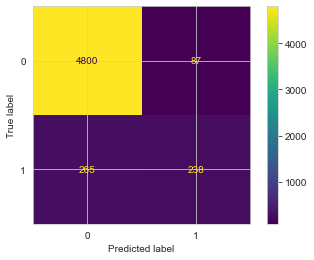

In [291]:
#y_train predict
cm = confusion_matrix(y_train_enc, y_pred_train_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)

disp.plot()
plt.show()

In [292]:

print(classification_report(y_train_enc,y_pred_train_lr))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      4887
           1       0.73      0.47      0.57       503

    accuracy                           0.93      5390
   macro avg       0.84      0.73      0.77      5390
weighted avg       0.93      0.93      0.93      5390



## Hyperparameter Tuning

In [296]:
#define dari parameter yang ingin kita cari di gridsearch
hyperparameters = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10], 'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'max_iter': [100, 1000]}

In [297]:
#define variable gridsearch
grid_search = GridSearchCV(LogisticRegression(),hyperparameters,refit=True,verbose=2)

In [298]:
#mencari parameter terbaik dengan grid search
grid_search.fit(X_train_pipline,y_train_enc)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..C=0.1, max_iter=100, penalty=l1, sol

C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s


C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s


C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s


C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_ite

C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s


C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s


C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s


C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s


C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, max_ite

C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sumaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Valu

Best parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.94


In [300]:
#define model setelah dapat param dari grid search
lr_tuning=grid_search.best_estimator_

In [301]:
#melihat isi parameter model
lr_tuning
     

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [303]:
#validation score setelah model di tuning
scores_lr_tuning = cross_val_score(lr_tuning, X_train_pipline, y_train,cv=5)

In [304]:
#melihat mean dari hasil validation model setelah di tuning
scores_lr_tuning.mean()

0.9380333951762523

In [305]:
#melihat std dari hasil validation model setelah di tuning
scores_lr_tuning.std()

0.006192326259101537

In [306]:
#tampilan model dengan validation score sebelum dan setelah di tuning
print(f'score Mean model sebelum di tuning:{scoreslr.mean()}')
print(f'score Mean model setelah di tuning:{scores_lr_tuning.mean()}')

score Mean model sebelum di tuning:0.9332096474953617
score Mean model setelah di tuning:0.9380333951762523


In [307]:
#model tuning predict
y_pred_train_lr_model_tuning = lr_tuning.predict(X_train_pipline)


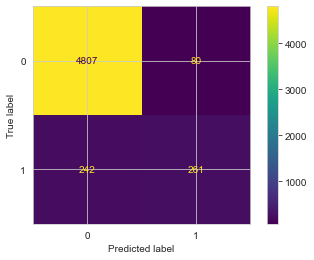

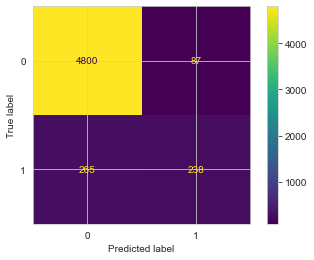

In [308]:
#y_train setelah tuning  predik
cm = confusion_matrix(y_train_enc, y_pred_train_lr_model_tuning, labels=lr_tuning.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_tuning.classes_)

disp.plot()
plt.show()

#y_train predict
cm = confusion_matrix(y_train_enc, y_pred_train_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)

disp.plot()
plt.show()

In [309]:
print('sebelum di tuning')
print(classification_report(y_train_enc,y_pred_train_lr))
print('')
print('setelah di tuning')
print(classification_report(y_train_enc,y_pred_train_lr_model_tuning))

sebelum di tuning
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      4887
           1       0.73      0.47      0.57       503

    accuracy                           0.93      5390
   macro avg       0.84      0.73      0.77      5390
weighted avg       0.93      0.93      0.93      5390


setelah di tuning
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4887
           1       0.77      0.52      0.62       503

    accuracy                           0.94      5390
   macro avg       0.86      0.75      0.79      5390
weighted avg       0.93      0.94      0.94      5390



In [310]:
#Tampilan predict model setelah di tuning dan sebelum di tuning
print('-----TRAIN-----')
print('accuracy score train SVM sebelum di tuning : ',accuracy_score(y_train_enc,y_pred_train_lr_model_tuning))
print('accuracy score train SVM setelah di tuning : ',accuracy_score(y_train_enc,y_pred_train_lr))
print('')

-----TRAIN-----
accuracy score train SVM sebelum di tuning :  0.9402597402597402
accuracy score train SVM setelah di tuning :  0.9346938775510204



## 9-Model Inference

In [311]:
#reset index data inference
data_inf = data_inf.reset_index(drop=True)
data_inf

Provider PotentialFraud  InscClaimAmtReimbursed  DeductibleAmtPaid  \
0   PRV54413             No                    3150               40.0   
1   PRV56541            Yes                  584000            56604.0   
2   PRV51688             No                   22660             2136.0   
3   PRV56796             No                   71490             2466.0   
4   PRV56696             No                   69220             7546.0   
5   PRV52021            Yes                 1951850           193530.0   
6   PRV51641             No                    1700               90.0   
7   PRV57724             No                      80                0.0   
8   PRV53073             No                    1270                0.0   
9   PRV55135             No                   25000             3204.0   
10  PRV57633             No                   31000             4272.0   
11  PRV54365             No                   31190              380.0   
12  PRV57432             No                   13420              110.0   
13  PRV57510             No                  486990            46064.0   
14  PRV55483            Yes                  778040            66346.0   
15  PRV55557             No                   60450             4422.0   
16  PRV53968             No                    6600              150.0   
17  PRV56502             No                    1410                0.0   
18  PRV53353             No                    9310               10.0   
19  PRV52714             No                     710                0.0   

    Hospitalization_Duration  Claim_Period  ExtraClaimDays  \
0                        0.0            21             0.0   
1                      378.0           378             0.0   
2                        8.0            15             0.0   
3                       15.0           163             0.0   
4                       43.0            75             0.0   
5                     1224.0          2424             0.0   
6                        0.0            14             0.0   
7                        0.0             2             0.0   
8                        0.0            14             0.0   
9                       12.0            12             0.0   
10                      49.0            49             0.0   
11                       0.0           254             0.0   
12                       0.0           133             0.0   
13                     276.0           831             0.0   
14                     445.0           456             0.0   
15                      18.0           173             0.0   
16                       0.0            96             0.0   
17                       0.0            15             0.0   
18                       0.0            78             0.0   
19                       0.0             7             0.0   

    Inpatient_or_Outpatient  Gender  Race  RenalDiseaseIndicator  \
0                         0       8    20                      2   
1                        54      21    64                     19   
2                         2       6     9                      1   
3                         3      44   110                     21   
4                         7      14    50                      7   
5                       181     284   758                    129   
6                         0       1    23                      3   
7                         0       2     6                      0   
8                         0       2    14                      0   
9                         3       3     3                      0   
10                        4       2     4                      0   
11                        0      27   117                     23   
12                        0      24    48                     11   
13                       43      97   286                     41   
14                       65      33    86                     23   
15                        4      28    70                 

In [312]:

#mendefinisikan nama data_inf menjadi inference
inference=data_inf

In [313]:
#membuat mendefiniskan inference_pipline terhadap data inference sudah di panggil fungsi pipline
inference_pipline= preprocess.transform(inference)

In [315]:
#mendefinisikan variable yang berisi model
y_pred_inf_seq =lr_tuning.predict(inference_pipline)

In [316]:
#memakai fungsi numpy agar target menjadi 0 dan 1
y_pred_inf_seq=np.where(y_pred_inf_seq >= 0.5, 1, 0)

In [317]:
#kembalikan ke bentuk semula menjadi yes dan no
y_pred_inf_seq= labelencoder.inverse_transform(y_pred_inf_seq)

In [318]:
#cek apakah sudah berubah
y_pred_inf_seq

array(['No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No'],
      dtype=object)

In [319]:

#rubah ke data frame
y_pred_inf_seq = pd.DataFrame(y_pred_inf_seq, columns=['sequential'])
y_pred_inf_seq

sequential
0          No
1         Yes
2         Yes
3          No
4         Yes
5         Yes
6          No
7          No
8          No
9         Yes
10        Yes
11         No
12         No
13        Yes
14        Yes
15        Yes
16         No
17         No
18         No
19         No

In [320]:
#Buat dataframe prediction
predictions = pd.concat([inference['PotentialFraud'], y_pred_inf_seq], axis=1)
predictions.columns = ['Actual','Prediksi']
predictions

Actual Prediksi
0      No       No
1     Yes      Yes
2      No      Yes
3      No       No
4      No      Yes
5     Yes      Yes
6      No       No
7      No       No
8      No       No
9      No      Yes
10     No      Yes
11     No       No
12     No       No
13     No      Yes
14    Yes      Yes
15     No      Yes
16     No       No
17     No       No
18     No       No
19     No       No

Dari 20 data inference Model berhasil menebak 14 data